In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import scipy.stats as stats

In [2]:
file_path = 'C:/Users/hp/Desktop/Data Analytics/Assignments/Python/Python Foundation End to End Case Study E-Commerce Analytics Project _A 5/'
customers = pd.read_csv( file_path + 'CUSTOMERS.csv')
sellers = pd.read_csv( file_path + 'SELLERS.csv')
products = pd.read_csv( file_path + 'PRODUCTS.csv')
orders = pd.read_csv( file_path + 'ORDERS.csv')
items = pd.read_csv( file_path + 'ORDER_ITEMS.csv')
payments = pd.read_csv( file_path + 'ORDER_PAYMENTS.csv')
reviews = pd.read_csv( file_path + 'ORDER_REVIEW_RATINGS.csv')
gloc = pd.read_csv( file_path + 'GEO_LOCATION.csv')

In [3]:
def fn_cont_summary( x ):
    
    # freq and missings
    n_total = x.shape[0]
    n_miss = x.isna().sum()
    perc_miss = n_miss * 100 / n_total
    
    # outliers - iqr
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr
    
    return pd.Series( [ x.dtype, x.nunique(), n_total, x.count(), n_miss, perc_miss,
                       x.sum(), x.mean(), x.std(), x.var(), 
                       lc_iqr, uc_iqr, 
                       x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), 
                       x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), 
                       x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max() ], 
                     
                    index = ['dtype', 'cardinality', 'n_tot', 'n', 'nmiss', 'perc_miss',
                             'sum', 'mean', 'std', 'var',
                        'lc_iqr', 'uc_iqr',
                        'min', 'p1', 'p5', 'p10', 'p25', 'p50', 'p75', 'p90', 'p95', 'p99', 'max']) 

In [4]:
def fn_cat_descriptive(x):
     # missing values calculation
    ntot = x.shape[0]
    n = x.count()
    nmiss = ntot - n
    nmiss_perc = nmiss*100/ntot
    freq = x.value_counts().sort_values(ascending = False).reset_index().iloc[0,1]
    freq_prec = freq *100/n
     # return the descripitves
    return pd.Series( [x.dtype, x.nunique(), 
                       ntot, n, nmiss, nmiss_perc, 
                       x.mode()[0],freq ,freq_prec],
                    index = ['dtype', 'cardinality',
                             'ntot', 'n', 'nmiss', 'nmiss_perc',
                             'mode', 'mode_freq','mode_perc'])

In [5]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [7]:
customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 20
dtype: int64

In [8]:
customers['customer_zip_code_prefix'] = customers['customer_zip_code_prefix'].astype('object')

In [9]:
customers.apply(fn_cat_descriptive).T

,dtype,cardinality,ntot,n,nmiss,nmiss_perc,mode,mode_freq,mode_perc
customer_id,object,99441,99441,99441,0,0.0,00012a2ce6f8dcda20d059ce98491703,1,0.001006
customer_unique_id,object,96096,99441,99441,0,0.0,8d50f5eadf50201ccdcedfb9e2ac8455,17,0.017096
customer_zip_code_prefix,object,14994,99441,99441,0,0.0,22790,142,0.142798
customer_city,object,4119,99441,99441,0,0.0,Akkarampalle,15540,15.627357
customer_state,object,20,99441,99441,0,0.0,Andhra Pradesh,60688,61.029153


In [10]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [12]:
orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         88789
order_approved_at                50462
order_delivered_carrier_date     61544
order_delivered_customer_date    75649
order_estimated_delivery_date      459
dtype: int64

In [13]:
orders.apply(fn_cat_descriptive).T

,dtype,cardinality,ntot,n,nmiss,nmiss_perc,mode,mode_freq,mode_perc
order_id,object,99441,99441,99441,0,0.0,00010242fe8c5a6d1ba2dd792cb16214,1,0.001006
customer_id,object,99441,99441,99441,0,0.0,00012a2ce6f8dcda20d059ce98491703,1,0.001006
order_status,object,8,99441,99441,0,0.0,delivered,96478,97.020344
order_purchase_timestamp,object,88789,99441,99441,0,0.0,8/2/2018 12:06,28,0.028157
order_approved_at,object,50462,99441,99281,160,0.160899,1/10/2018 10:32,109,0.109789
order_delivered_carrier_date,object,61544,99441,97658,1783,1.793023,5/9/2018 15:48,47,0.048127
order_delivered_customer_date,object,75649,99441,96476,2965,2.981668,12/11/2017 18:52,7,0.007256
order_estimated_delivery_date,object,459,99441,99441,0,0.0,12/20/2017 0:00,522,0.524934


In [14]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14


In [15]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [16]:
items.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    54615
price                   5968
freight_value           6999
dtype: int64

In [17]:
items['order_item_id'] = items['order_item_id'].astype('object')

In [18]:
items_continuous = items.select_dtypes(['int64','float64'])
items_categorical = items.select_dtypes('object')

In [19]:
items = pd.concat([items_categorical,items_continuous], axis = 1 )

In [20]:
items_continuous.apply(fn_cont_summary)

,price,freight_value
dtype,float64,float64
cardinality,5968,6999
n_tot,112650,112650
n,112650,112650
nmiss,0,0
perc_miss,0.0,0.0
sum,13591643.7,2251909.54
mean,120.653739,19.99032
std,183.633928,15.806405
var,33721.419531,249.842452


In [21]:
items_categorical.apply(fn_cat_descriptive).T

,dtype,cardinality,ntot,n,nmiss,nmiss_perc,mode,mode_freq,mode_perc
order_id,object,98666,112650,112650,0,0.0,8272b63d03f5f79c56e9e4120aec44ef,21,0.018642
order_item_id,object,21,112650,112650,0,0.0,1,98666,87.586329
product_id,object,32951,112650,112650,0,0.0,aca2eb7d00ea1a7b8ebd4e68314663af,527,0.467821
seller_id,object,3095,112650,112650,0,0.0,6560211a19b47992c3666cc44a7e94c0,2033,1.804705
shipping_limit_date,object,54615,112650,112650,0,0.0,2/27/2018 3:31,55,0.048824


In [22]:
items = items.assign(amount = items['price'] + items['freight_value'])
items_1 = items.groupby(['order_id', 'product_id', 'seller_id']).agg({'order_item_id': 'count','amount':'sum','price':'sum','freight_value':'sum'}).reset_index()
items_1.rename( columns = {'order_item_id': 'order_item_qty'}, inplace = True )

In [23]:
items_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102425 entries, 0 to 102424
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   order_id        102425 non-null  object 
 1   product_id      102425 non-null  object 
 2   seller_id       102425 non-null  object 
 3   order_item_qty  102425 non-null  int64  
 4   amount          102425 non-null  float64
 5   price           102425 non-null  float64
 6   freight_value   102425 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 5.5+ MB


In [24]:
items_1_continuous = items_1.select_dtypes(['int64','float64'])
items_1_categorical = items_1.select_dtypes('object')

In [25]:
items_1 = pd.concat([items_1_categorical,items_1_continuous], axis = 1 )

In [26]:
items_1_continuous.apply(fn_cont_summary)

,order_item_qty,amount,price,freight_value
dtype,int64,float64,float64,float64
cardinality,16,31223,6990,7963
n_tot,102425,102425,102425,102425
n,102425,102425,102425,102425
nmiss,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0
sum,112650,15843553.24,13591643.7,2251909.54
mean,1.099829,154.684435,132.698498,21.985936
std,0.456926,214.501057,205.308847,20.464659
var,0.208782,46010.703419,42151.722536,418.802256


In [27]:
items_1_categorical.apply(fn_cat_descriptive).T

,dtype,cardinality,ntot,n,nmiss,nmiss_perc,mode,mode_freq,mode_perc
order_id,object,98666,102425,102425,0,0.0,ca3625898fbd48669d50701aba51cd5f,8,0.007811
product_id,object,32951,102425,102425,0,0.0,99a4788cb24856965c36a24e339b6058,467,0.455943
seller_id,object,3095,102425,102425,0,0.0,6560211a19b47992c3666cc44a7e94c0,1982,1.935074


In [28]:
items_1

,order_id,product_id,seller_id,order_item_qty,amount,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,1,72.19,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,1,259.83,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1,216.87,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,1,25.78,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,1,218.04,199.90,18.14
...,...,...,...,...,...,...,...
102420,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,1,343.40,299.99,43.41
102421,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,1,386.53,350.00,36.53
102422,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,1,116.85,99.90,16.95
102423,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,1,64.71,55.99,8.72


In [29]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [30]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [31]:
payments.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

In [32]:
payments.payment_type.value_counts()

credit_card    76795
UPI            19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [33]:
payments[payments.payment_type=='not_defined']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


In [34]:
payments.drop([51280,57411,94427],inplace=True)

In [35]:
payments.nunique()

order_id                99437
payment_sequential         29
payment_type                4
payment_installments       24
payment_value           29077
dtype: int64

In [36]:
payments_continuous = payments.select_dtypes(['int64','float64'])
payments_categorical = payments.select_dtypes('object')

In [37]:

payments_continuous.apply(fn_cont_summary)

,payment_sequential,payment_installments,payment_value
dtype,int64,int64,float64
cardinality,29,24,29077
n_tot,103883,103883,103883
n,103883,103883,103883
nmiss,0,0,0
perc_miss,0.0,0.0,0.0
sum,113511,296420,16008872.12
mean,1.092681,2.853402,154.104831
std,0.706594,2.687071,217.495628
var,0.499275,7.220351,47304.34809


In [38]:
payments_categorical.apply(fn_cat_descriptive).T

,dtype,cardinality,ntot,n,nmiss,nmiss_perc,mode,mode_freq,mode_perc
order_id,object,99437,103883,103883,0,0.0,fa65dad1b0e818e3ccc5cb0e39231352,29,0.027916
payment_type,object,4,103883,103883,0,0.0,credit_card,76795,73.924511


In [39]:
payments = pd.concat([payments_categorical,payments_continuous], axis = 1 )

In [40]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [41]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [42]:
products.nunique()

product_id                    32951
product_category_name            71
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [43]:
products = products.select_dtypes(['object','float64']).astype('object')

In [44]:
products.apply(fn_cat_descriptive).T

,dtype,cardinality,ntot,n,nmiss,nmiss_perc,mode,mode_freq,mode_perc
product_id,object,32951,32951,32951,0,0.0,00066f42aeeb9f3007548bb9d3f33c38,1,0.003035
product_category_name,object,71,32951,32328,623,1.890686,Bed_Bath_Table,3029,9.369587
product_name_lenght,object,66,32951,32341,610,1.851234,60.0,2182,6.746854
product_description_lenght,object,2960,32951,32341,610,1.851234,404.0,94,0.290653
product_photos_qty,object,19,32951,32341,610,1.851234,1.0,16489,50.984818
product_weight_g,object,2204,32951,32949,2,0.00607,200.0,2084,6.324926
product_length_cm,object,99,32951,32949,2,0.00607,16.0,5520,16.753164
product_height_cm,object,102,32951,32949,2,0.00607,10.0,2548,7.733163
product_width_cm,object,95,32951,32949,2,0.00607,11.0,3718,11.284106


In [45]:
products.dropna( axis = 0, subset = ['product_category_name'] ,inplace = True)

In [46]:
reviews.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00,2/18/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,4/21/2017 0:00,4/21/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,3/1/2018 0:00,3/2/2018 10:26


In [47]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_creation_date     100000 non-null  object
 4   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [48]:
reviews.nunique()

review_id                  99173
order_id                   99441
review_score                   5
review_creation_date         637
review_answer_timestamp    89500
dtype: int64

In [49]:
reviews_continuous = reviews.select_dtypes(['int64','float64'])
reviews_categorical = reviews.select_dtypes('object')

In [50]:
reviews_continuous.apply(fn_cont_summary)

,review_score
dtype,int64
cardinality,5
n_tot,100000
n,100000
nmiss,0
perc_miss,0.0
sum,407089
mean,4.07089
std,1.359663
var,1.848683


In [51]:
reviews_categorical.apply(fn_cat_descriptive).T

,dtype,cardinality,ntot,n,nmiss,nmiss_perc,mode,mode_freq,mode_perc
review_id,object,99173,100000,100000,0,0.0,08528f70f579f0c830189efc523d2182,3,0.003
order_id,object,99441,100000,100000,0,0.0,03c939fd7fd3b38f8485a0f95798f1f6,3,0.003
review_creation_date,object,637,100000,100000,0,0.0,12/19/2017 0:00,466,0.466
review_answer_timestamp,object,89500,100000,100000,0,0.0,8/12/2017 14:35,6,0.006


In [52]:
reviews = pd.concat([reviews_categorical,reviews_continuous], axis = 1 )

In [53]:
gloc.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh
2,1041,-23.544392,-46.639499,Akkarampalle,Andhra Pradesh
3,1035,-23.541578,-46.641607,Akkarampalle,Andhra Pradesh
4,1012,-23.547762,-46.635361,Akkarampalle,Andhra Pradesh


In [54]:
gloc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19015 entries, 0 to 19014
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
 3   geolocation_city             19015 non-null  object 
 4   geolocation_state            19015 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 742.9+ KB


In [55]:
gloc.nunique()

geolocation_zip_code_prefix    19015
geolocation_lat                18987
geolocation_lng                18988
geolocation_city                3809
geolocation_state                 20
dtype: int64

In [56]:
gloc['geolocation_zip_code_prefix'] = gloc['geolocation_zip_code_prefix'].astype('object')
gloc['geolocation_lat'] = gloc['geolocation_lat'].astype('object')
gloc['geolocation_lng'] = gloc['geolocation_lng'].astype('object')

In [57]:
gloc.apply(fn_cat_descriptive).T

,dtype,cardinality,ntot,n,nmiss,nmiss_perc,mode,mode_freq,mode_perc
geolocation_zip_code_prefix,object,19015,19015,19015,0,0.0,1001,1,0.005259
geolocation_lat,object,18987,19015,19015,0,0.0,-15.797782,8,0.042072
geolocation_lng,object,18988,19015,19015,0,0.0,-47.874682,8,0.042072
geolocation_city,object,3809,19015,19015,0,0.0,Akkarampalle,5889,30.970287
geolocation_state,object,20,19015,19015,0,0.0,Andhra Pradesh,11218,58.99553


In [58]:
# merge datasets
orders_items = pd.merge(orders, items_1, on='order_id')
orders_products = pd.merge(orders_items, products,how='left', on='product_id')
orders_data =pd.merge(orders_products,customers,how='left', on='customer_id')

In [59]:
# convert date columns to datetime
orders_data['order_purchase_timestamp'] = pd.to_datetime(orders_data['order_purchase_timestamp'])
reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date'])
reviews['review_answer_timestamp'] = pd.to_datetime(reviews['review_answer_timestamp'])

In [60]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102425 entries, 0 to 102424
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       102425 non-null  object        
 1   customer_id                    102425 non-null  object        
 2   order_status                   102425 non-null  object        
 3   order_purchase_timestamp       102425 non-null  datetime64[ns]
 4   order_approved_at              102411 non-null  object        
 5   order_delivered_carrier_date   101397 non-null  object        
 6   order_delivered_customer_date  100195 non-null  object        
 7   order_estimated_delivery_date  102425 non-null  object        
 8   product_id                     102425 non-null  object        
 9   seller_id                      102425 non-null  object        
 10  order_item_qty                 102425 non-null  int64         
 11  

In [61]:
orders_data.nunique()

order_id                         98666
customer_id                      98666
order_status                         7
order_purchase_timestamp         88157
order_approved_at                50226
order_delivered_carrier_date     61543
order_delivered_customer_date    75649
order_estimated_delivery_date      450
product_id                       32951
seller_id                         3095
order_item_qty                      16
amount                           31223
price                             6990
freight_value                     7963
product_category_name               71
product_name_lenght                 66
product_description_lenght        2960
product_photos_qty                  19
product_weight_g                  2201
product_length_cm                   99
product_height_cm                  102
product_width_cm                    95
customer_unique_id               95420
customer_zip_code_prefix         14976
customer_city                     4110
customer_state           

In [62]:
orders_data_continuous = orders_data.select_dtypes(['int64','float64'])
orders_data_categorical = orders_data.select_dtypes(['datetime64[ns]','object'])

In [63]:
orders_data_continuous.apply(fn_cont_summary)

,order_item_qty,amount,price,freight_value
dtype,int64,float64,float64,float64
cardinality,16,31223,6990,7963
n_tot,102425,102425,102425,102425
n,102425,102425,102425,102425
nmiss,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0
sum,112650,15843553.24,13591643.7,2251909.54
mean,1.099829,154.684435,132.698498,21.985936
std,0.456926,214.501057,205.308847,20.464659
var,0.208782,46010.703419,42151.722536,418.802256


In [64]:
orders_data_categorical.apply(fn_cat_descriptive).T

,dtype,cardinality,ntot,n,nmiss,nmiss_perc,mode,mode_freq,mode_perc
order_id,object,98666,102425,102425,0,0.0,ca3625898fbd48669d50701aba51cd5f,8,0.007811
customer_id,object,98666,102425,102425,0,0.0,0d861a5e4dd6a9079d89e1330848f0ab,8,0.007811
order_status,object,7,102425,102425,0,0.0,delivered,100196,97.823773
order_purchase_timestamp,datetime64[ns],88157,102425,102425,0,0.0,2018-08-02 12:06:00,28,0.027337
order_approved_at,object,50226,102425,102411,14,0.013669,1/10/2018 10:32,110,0.10741
order_delivered_carrier_date,object,61543,102425,101397,1028,1.003661,5/9/2018 15:48,47,0.046352
order_delivered_customer_date,object,75649,102425,100195,2230,2.177203,8/21/2018 12:18,10,0.009981
order_estimated_delivery_date,object,450,102425,102425,0,0.0,12/20/2017 0:00,541,0.528191
product_id,object,32951,102425,102425,0,0.0,99a4788cb24856965c36a24e339b6058,467,0.455943
seller_id,object,3095,102425,102425,0,0.0,6560211a19b47992c3666cc44a7e94c0,1982,1.935074


In [72]:
orders_data = pd.concat([orders_data_categorical,orders_data_continuous], axis = 1 )

In [73]:
orders_data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'product_id', 'seller_id', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_item_qty', 'amount', 'price', 'freight_value'],
      dtype='object')

In [74]:
orders_data = orders_data[[ 'order_purchase_timestamp','order_id','product_id','product_category_name','order_item_qty','amount','price', 'freight_value','customer_id', 'seller_id',
             'customer_zip_code_prefix', 'customer_city','customer_state']]

In [75]:
orders_data

,order_purchase_timestamp,order_id,product_id,product_category_name,order_item_qty,amount,price,freight_value,customer_id,seller_id,customer_zip_code_prefix,customer_city,customer_state
0,2017-10-02 10:56:00,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,Housewares,1,38.71,29.99,8.72,9ef432eb6251297304e76186b10a928d,3504c0cb71d7fa48d967e0e4c94d59d9,3149,Akkarampalle,Andhra Pradesh
1,2018-07-24 20:41:00,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8,Perfumery,1,141.46,118.70,22.76,b0830fb4747a6c6d20dea0b8c802d7ef,289cdb325fb7e7f891c38608bf9e0962,47813,Pandariya,Chhattisgarh
2,2018-08-08 08:38:00,47770eb9100c2d0c44946d9cf07ec65d,aa4383b373c6aca5d8797843e5594415,Auto,1,179.12,159.90,19.22,41ce2a54c0b03bf3443c3d931a367089,4869f7a5dfa277a7dca6462dcf3b52b2,75265,Dhamdha,Chhattisgarh
3,2017-11-18 19:28:00,949d5b44dbf5de918fe9c16f97b45f8a,d0b61bfb1de832b15ba9d266ca96e5b0,Pet_Shop,1,72.20,45.00,27.20,f88197465ea7920adcdbec7375364d82,66922902710d126a0e7d26b0e3805106,59296,Kartarpur,Punjab
4,2018-02-13 21:18:00,ad21c59c0840e6cb83a9ceb5573f8159,65266b2da20d04dbe00c5c2d3bb7859e,Stationery,1,28.62,19.90,8.72,8ab97904e6daea8866dbdbc4fb7aad2c,2c9e548be18521d1c43cde1c582c6de8,9195,Bheemavaram,Andhra Pradesh
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102420,2017-03-09 09:54:00,9c5dedf39a927c1b2549525ed64a053c,ac35486adb7b02598c182c2ff2e05254,Health_Beauty,1,85.08,72.00,13.08,39bd1228ee8140590ac3aca26f2dfe00,e24fc9fcd865784fb25705606fe3dfe7,12209,Bobbili,Andhra Pradesh
102421,2018-02-06 12:58:00,63943bddc261676b46f01ca7ac2f7bd8,f1d4ce8c6dd66c47bbaa8c6781c2a923,Baby,1,195.00,174.90,20.10,1fca14ff2861355f6e5f14306ff977a7,1f9ab4708f3056ede07124aad39a2554,11722,Mahendragarh,Haryana
102422,2017-08-27 14:46:00,83c1379a015df1e13d02aae0204711ab,b80910977a37536adeddd63663f916ad,Home_Appliances_2,1,271.01,205.99,65.02,1aa71eb042121263aafbe80c1b562c9c,d50d79cb34e38265a8649c383dcffd48,45920,Bidasar,Rajasthan
102423,2018-01-08 21:28:00,11c177c8e97725db2631073c19f07b62,d1c427060a0f73f6b889a5c7c61f2ac4,Computers_Accessories,2,441.16,359.98,81.18,b331b74b18dc79bcdf6532d51e1637c1,a1043bafd471dff536d0c462352beb48,28685,Banaur,Punjab


1. Perform Detailed exploratory analysis

a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total 
products, Total categories, Total sellers, Total locations, Total channels, Total 
payment methods etc…) 

Total revenue: Sum of all order values.

In [76]:
# Total revenue
total_revenue = payments['payment_value'].sum().round(2)
print('Total revenue:', total_revenue)

Total revenue: 16008872.12


Total quantity: Sum of all order item quantities.

In [77]:
# Total quantity
total_quantity = orders_data['order_item_qty'].sum()
print('Total quantity:',total_quantity)

Total quantity: 112650


Total products: Total number of unique products that were sold.

In [78]:
# Total products
total_products = orders_data['product_id'].nunique()
print('Total products:', total_products )

Total products: 32951


Total categories: Total number of unique categories that the products belong to.

In [79]:
# Total categories
total_categories = orders_data['product_category_name'].nunique()
print('Total categories:',total_categories)

Total categories: 71


Total sellers: Total number of distinct sellers that sold products.

In [80]:
# Total sellers
total_sellers = orders_data['seller_id'].nunique()
print('Total sellers:',total_sellers)

Total sellers: 3095


Total locations: Total number of distinct locations where customers placed orders from.

In [81]:
# Total locations
total_locations = orders_data['customer_zip_code_prefix'].nunique()
print('Total locations:', total_locations)

Total locations: 14976


Total payment methods: This is the total number of distinct payment methods that customers used to make payments.

In [82]:
payments['payment_type'].value_counts()

credit_card    76795
UPI            19784
voucher         5775
debit_card      1529
Name: payment_type, dtype: int64

In [83]:
# Total payment methods
total_payment_methods = payments['payment_type'].nunique()
print('Total payment methods:',total_payment_methods)

Total payment methods: 4


b. Understanding how many new customers acquired every month

In [84]:
monthly_new_customers = orders_data.groupby(orders_data['order_purchase_timestamp'].dt.to_period('M'))['customer_id'].nunique()
monthly_new_customers

order_purchase_timestamp
2016-09       3
2016-10     308
2016-12       1
2017-01     789
2017-02    1733
2017-03    2641
2017-04    2391
2017-05    3660
2017-06    3217
2017-07    3969
2017-08    4293
2017-09    4243
2017-10    4568
2017-11    7451
2017-12    5624
2018-01    7220
2018-02    6694
2018-03    7188
2018-04    6934
2018-05    6853
2018-06    6160
2018-07    6273
2018-08    6452
2018-09       1
Freq: M, Name: customer_id, dtype: int64

In [85]:
monthly_new_customers.mean()

4111.083333333333

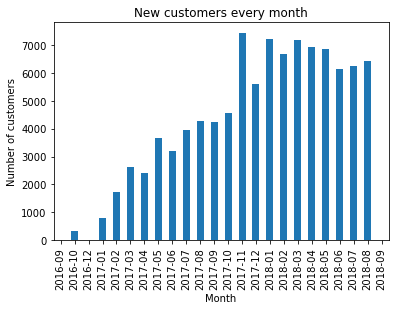

In [86]:
monthly_new_customers.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of customers')
plt.title('New customers every month')
plt.show()

c. Understand the retention of customers on month on month basis

In [87]:
monthly_customers = orders_data.groupby(orders_data['order_purchase_timestamp'].dt.to_period('M'))['customer_id'].nunique()
# customers who made a repeat purchase in each month
monthly_repeat_customers = orders_data[orders_data['customer_id'].duplicated(keep=False)].groupby(orders_data['order_purchase_timestamp'].dt.to_period('M'))['customer_id'].nunique()
# Monthly Customer retention % 
customer_retention = monthly_repeat_customers*100 / monthly_customers
print('Monthly Customer retention')
customer_retention

Monthly Customer retention


order_purchase_timestamp
2016-09    33.333333
2016-10     3.896104
2016-12          NaN
2017-01     3.548796
2017-02     2.769763
2017-03     2.991291
2017-04     2.927645
2017-05     3.524590
2017-06     2.984147
2017-07     3.628118
2017-08     3.377591
2017-09     3.087438
2017-10     3.721541
2017-11     3.704201
2017-12     2.987198
2018-01     3.656510
2018-02     2.509710
2018-03     2.838063
2018-04     3.720796
2018-05     3.297826
2018-06     3.522727
2018-07     3.012912
2018-08     3.301302
2018-09          NaN
Freq: M, Name: customer_id, dtype: float64

In [88]:
customer_retention.dropna().mean()

4.651891089464333

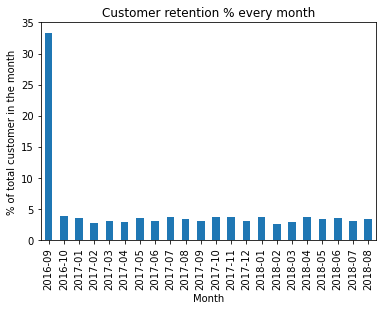

In [90]:
customer_retention.dropna().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('% of total customer in the month')
plt.title('Customer retention % every month')
plt.show()

d. How the revenues from existing/new customers on month on month basis

In [91]:
# New customers revenues
ord_1 = orders_data.groupby(orders_data['order_purchase_timestamp'].dt.to_period('M')).agg({'customer_id': 'nunique','amount':'sum'}).reset_index().rename(columns = {'customer_id':'New Customers','amount':'Revenue_nc'})
ord_1

,order_purchase_timestamp,New Customers,Revenue_nc
0,2016-09,3,354.75
1,2016-10,308,56808.84
2,2016-12,1,19.62
3,2017-01,789,137188.49
4,2017-02,1733,286280.62
5,2017-03,2641,432048.59
6,2017-04,2391,412422.24
7,2017-05,3660,586190.95
8,2017-06,3217,502963.04
9,2017-07,3969,584971.62


In [92]:
# Existing customers revenues
ord_2 = orders_data[orders_data['customer_id'].duplicated(keep=False)].groupby(orders_data['order_purchase_timestamp'].dt.to_period('M')).agg({'customer_id': 'nunique','amount':'sum'}).reset_index().rename(columns = {'customer_id':'Existing Customers','amount':'Revenue_ec'})
ord_2

,order_purchase_timestamp,Existing Customers,Revenue_ec
0,2016-09,1,136.23
1,2016-10,12,2513.33
2,2017-01,28,6132.05
3,2017-02,48,11515.52
4,2017-03,79,17579.01
5,2017-04,70,14189.67
6,2017-05,129,29226.27
7,2017-06,96,23895.86
8,2017-07,144,34963.26
9,2017-08,145,31243.41


In [94]:
# revenue from new and existing customers for each month
monthly_revenue_by_customer_type = pd.merge(ord_1, ord_2, on = 'order_purchase_timestamp')
monthly_revenue_by_customer_type

,order_purchase_timestamp,New Customers,Revenue_nc,Existing Customers,Revenue_ec
0,2016-09,3,354.75,1,136.23
1,2016-10,308,56808.84,12,2513.33
2,2017-01,789,137188.49,28,6132.05
3,2017-02,1733,286280.62,48,11515.52
4,2017-03,2641,432048.59,79,17579.01
5,2017-04,2391,412422.24,70,14189.67
6,2017-05,3660,586190.95,129,29226.27
7,2017-06,3217,502963.04,96,23895.86
8,2017-07,3969,584971.62,144,34963.26
9,2017-08,4293,668204.60,145,31243.41


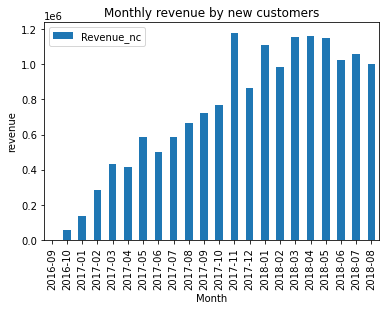

In [95]:
monthly_revenue_by_customer_type.plot(x = 'order_purchase_timestamp',y = 'Revenue_nc', kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('revenue')
plt.title('Monthly revenue by new customers')
plt.show()

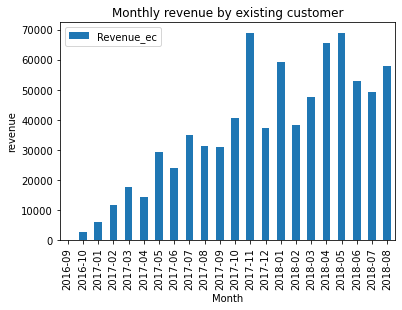

In [96]:
monthly_revenue_by_customer_type.plot(x = 'order_purchase_timestamp',y = 'Revenue_ec', kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('revenue')
plt.title('Monthly revenue by existing customer')
plt.show()

e. Understand the trends/seasonality of sales, quantity by category, location, month, 
week, day, time, channel, payment method etc…

A. calculate sales by category, location, month, week, day, time, channel, and payment method

1. Sales by category

In [97]:
sales_by_category = orders_data.groupby('product_category_name')['amount'].sum()
sales_by_category

product_category_name
Agro_Industry_And_Commerce      78374.07
Air_Conditioning                61774.19
Art                             28247.81
Arts_And_Craftmanship            2184.14
Audio                           56398.94
                                 ...    
Stationery                     277741.71
Tablets_Printing_Image           8754.61
Telephony                      394883.32
Toys                           561372.55
Watches_Gifts                 1305541.61
Name: amount, Length: 71, dtype: float64

In [99]:
# Top 10 categories
sales_by_category_T10 = orders_data.groupby('product_category_name')['amount'].sum().reset_index().sort_values(['amount'], ascending=[False]).head(10)
sales_by_category_T10

,product_category_name,amount
43,Health_Beauty,1441248.07
70,Watches_Gifts,1305541.61
7,Bed_Bath_Table,1241681.72
65,Sports_Leisure,1156656.48
15,Computers_Accessories,1059272.40
39,Furniture_Decor,902511.79
49,Housewares,778397.77
20,Cool_Stuff,719329.95
5,Auto,685384.32
42,Garden_Tools,584219.21


In [103]:
# Sales by Top10 category as % of total sales
sales_by_category_T10['% of total sale'] = sales_by_category_T10['amount']*100/sales_by_category.reset_index().amount.sum()
sales_by_category_T10

,product_category_name,amount,% of total sale
43,Health_Beauty,1441248.07,9.221102
70,Watches_Gifts,1305541.61,8.352852
7,Bed_Bath_Table,1241681.72,7.944277
65,Sports_Leisure,1156656.48,7.400285
15,Computers_Accessories,1059272.40,6.777222
39,Furniture_Decor,902511.79,5.774268
49,Housewares,778397.77,4.980187
20,Cool_Stuff,719329.95,4.602271
5,Auto,685384.32,4.385087
42,Garden_Tools,584219.21,3.737833


In [105]:
sales_by_category_T10['% of total sale'].sum()
# Top10 categories account for 63.2% of total sales.

63.175384504968946

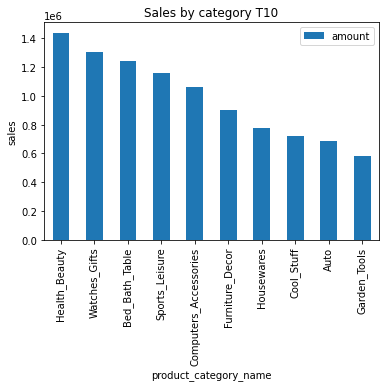

In [101]:
sales_by_category_T10.plot(x='product_category_name',kind='bar')
plt.xlabel('product_category_name')
plt.ylabel('sales')
plt.title('Sales by category T10')
plt.show()

In [106]:
Sales_by_product_T10 = orders_data.groupby(['product_id','product_category_name'])['amount'].sum().reset_index().sort_values(['amount'], ascending=[False]).head(10)
Sales_by_product_T10

,product_id,product_category_name,amount
23641,bb50f2e236e5eea0100680137654686c,Health_Beauty,67606.10
26533,d1c427060a0f73f6b889a5c7c61f2ac4,Computers_Accessories,60976.03
13808,6cdd53843498f92890544667809f1595,Health_Beauty,59093.99
19387,99a4788cb24856965c36a24e339b6058,Bed_Bath_Table,51071.60
27102,d6160fb7873f184099d9bc95e30376af,Computers,50326.18
7902,3dd2a17168ec895c781a9191c1e95ad7,Computers_Accessories,48212.22
21716,aca2eb7d00ea1a7b8ebd4e68314663af,Furniture_Decor,44820.76
12125,5f504b3a1c75b73d6151be81eb05bdc9,Cool_Stuff,41725.81
4901,25c38557cf793876c5abdd5931f922db,Baby,40311.95
10662,53b36df67ebb7c41585e8d54d6772e08,Watches_Gifts,39957.93


In [107]:
# Sales by Top10 products as % of total sales
Sales_by_product_T10['% of total sale'] = Sales_by_product_T10['amount']*100/sales_by_category.reset_index().amount.sum()
Sales_by_product_T10

,product_id,product_category_name,amount,% of total sale
23641,bb50f2e236e5eea0100680137654686c,Health_Beauty,67606.10,0.432544
26533,d1c427060a0f73f6b889a5c7c61f2ac4,Computers_Accessories,60976.03,0.390124
13808,6cdd53843498f92890544667809f1595,Health_Beauty,59093.99,0.378083
19387,99a4788cb24856965c36a24e339b6058,Bed_Bath_Table,51071.60,0.326756
27102,d6160fb7873f184099d9bc95e30376af,Computers,50326.18,0.321987
7902,3dd2a17168ec895c781a9191c1e95ad7,Computers_Accessories,48212.22,0.308462
21716,aca2eb7d00ea1a7b8ebd4e68314663af,Furniture_Decor,44820.76,0.286763
12125,5f504b3a1c75b73d6151be81eb05bdc9,Cool_Stuff,41725.81,0.266962
4901,25c38557cf793876c5abdd5931f922db,Baby,40311.95,0.257916
10662,53b36df67ebb7c41585e8d54d6772e08,Watches_Gifts,39957.93,0.255651


2. Sales by location

In [112]:
sales_by_location = orders_data.groupby('customer_zip_code_prefix')['amount'].sum()
sales_by_location

customer_zip_code_prefix
1003      98.97
1004     198.11
1005     570.72
1006     868.05
1007     505.55
          ...  
99960    141.63
99965    227.59
99970    252.74
99980    222.77
99990    270.45
Name: amount, Length: 14976, dtype: float64

In [137]:
sales_by_state = orders_data.groupby('customer_state')['amount'].sum()
sales_by_state_1=sales_by_state.reset_index()
# Sales by states as % of total sales
sales_by_state_1['% of total sale'] = sales_by_state_1['amount']*100/sales_by_state_1.amount.sum()
sales_by_state_1

,customer_state,amount,% of total sale
0,Andhra Pradesh,9329513.16,58.885232
1,Arunachal Pradesh,185467.27,1.170617
2,Chhattisgarh,1076784.03,6.796354
3,Delhi,578251.81,3.649761
4,Goa,989.83,0.006248
5,Gujarat,1246109.10,7.865086
6,Haryana,352845.56,2.227061
7,Himachal Pradesh,120783.25,0.762350
8,Jammu & Kashmir,250429.96,1.580643
9,Karnataka,624909.08,3.944248


In [138]:
# Sales by top10 states
sales_by_state_1.sort_values(['amount'], ascending=[False]).head(10)

,customer_state,amount,% of total sale
0,Andhra Pradesh,9329513.16,58.885232
5,Gujarat,1246109.10,7.865086
2,Chhattisgarh,1076784.03,6.796354
9,Karnataka,624909.08,3.944248
3,Delhi,578251.81,3.649761
11,Madhya Pradesh,489237.77,3.087930
16,Tamil Nadu,369377.50,2.331406
6,Haryana,352845.56,2.227061
12,Maharashtra,332966.48,2.101590
8,Jammu & Kashmir,250429.96,1.580643


In [139]:
# Number of orders by state
orders_by_state = orders_data.groupby('customer_state')['order_id'].count()
orders_by_state

customer_state
Andhra Pradesh       62590
Arunachal Pradesh     1144
Chhattisgarh          6494
Delhi                 3414
Goa                     10
Gujarat               7708
Haryana               2270
Himachal Pradesh       762
Jammu & Kashmir       1596
Karnataka             3990
Kerala                1563
Madhya Pradesh        2941
Maharashtra           2077
Orissa                 637
Punjab                 695
Rajasthan              824
Tamil Nadu            2179
Uttar Pradesh         1048
Uttaranchal             99
West Bengal            384
Name: order_id, dtype: int64

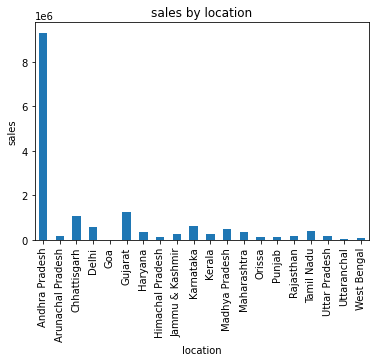

In [140]:
sales_by_state.plot(kind='bar')
plt.xlabel('location')
plt.ylabel('sales')
plt.title('sales by location')
plt.show()

3. Sales every month, Sales_by_month,Seansonality

In [141]:
orders_data1 = orders_data.groupby(['order_purchase_timestamp','order_id'])['amount'].sum().reset_index()
orders_data1

,order_purchase_timestamp,order_id,amount
0,2016-09-04 21:15:00,2e7a8482f6fb09756ca50c10d7bfc047,136.23
1,2016-09-05 00:15:00,e5fa5a7210941f7d56d0208e4e071d35,75.06
2,2016-09-15 12:16:00,bfbd0f9bdef84302105ad712db648a6c,143.46
3,2016-10-02 22:07:00,71303d7e93b399f5bcd537d124c0bcfa,109.34
4,2016-10-03 09:44:00,3b697a20d9e427646d92567910af6d57,45.46
...,...,...,...
98661,2018-08-29 14:18:00,0b223d92c27432930dfe407c6aea3041,510.96
98662,2018-08-29 14:18:00,168626408cb32af0ffaf76711caae1dc,61.29
98663,2018-08-29 14:52:00,03ef5dedbe7492bdae72eec50764c43f,33.23
98664,2018-08-29 15:00:00,35a972d7f8436f405b56e36add1a7140,93.75


In [142]:
sales_monthly = orders_data1.groupby(orders_data1['order_purchase_timestamp'].dt.to_period('M'))['amount'].sum()
sales_monthly

order_purchase_timestamp
2016-09        354.75
2016-10      56808.84
2016-12         19.62
2017-01     137188.49
2017-02     286280.62
2017-03     432048.59
2017-04     412422.24
2017-05     586190.95
2017-06     502963.04
2017-07     584971.62
2017-08     668204.60
2017-09     720398.91
2017-10     769312.37
2017-11    1179143.77
2017-12     863547.23
2018-01    1107301.89
2018-02     986908.96
2018-03    1155126.82
2018-04    1159698.04
2018-05    1149781.82
2018-06    1022677.11
2018-07    1058728.03
2018-08    1003308.47
2018-09        166.46
Freq: M, Name: amount, dtype: float64

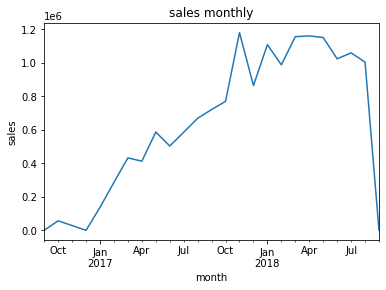

In [143]:
sales_monthly.plot(kind='line')
plt.xlabel('month')
plt.ylabel('sales')
plt.title('sales monthly')
plt.show()

In [197]:
# Avg sales by month
var_1=sales_monthly.reset_index()
var_1['month']=var_1.order_purchase_timestamp.dt.month
var_2 = var_1.groupby('month')['amount'].mean()
var_2.reset_index().sort_values(by='amount',ascending=False)

,month,amount
10,11,1.179144e+06
4,5,8.679864e+05
7,8,8.357565e+05
6,7,8.218498e+05
2,3,7.935877e+05
3,4,7.860601e+05
5,6,7.628201e+05
1,2,6.365948e+05
0,1,6.222452e+05
11,12,4.317834e+05


In [145]:
var_2.reset_index().sort_values(['amount'], ascending=[False]).head(10)

,month,amount
10,11,1179143.770
4,5,867986.385
7,8,835756.535
6,7,821849.825
2,3,793587.705
3,4,786060.140
5,6,762820.075
1,2,636594.790
0,1,622245.190
11,12,431783.425


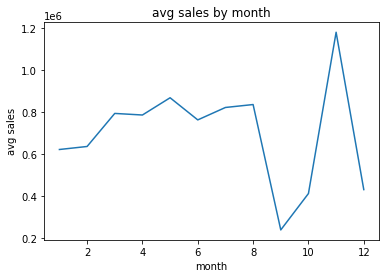

In [146]:
var_2.plot(kind='line')
plt.xlabel('month')
plt.ylabel('avg sales')
plt.title('avg sales by month')
plt.show()

In [147]:
average_order_value_monthly = orders_data1.groupby(orders_data1['order_purchase_timestamp'].dt.to_period('M'))['amount'].mean()
average_order_value_monthly

order_purchase_timestamp
2016-09    118.250000
2016-10    184.444286
2016-12     19.620000
2017-01    173.876413
2017-02    165.193664
2017-03    163.592802
2017-04    172.489435
2017-05    160.161462
2017-06    156.345365
2017-07    147.385140
2017-08    155.649802
2017-09    169.785272
2017-10    168.413391
2017-11    158.253090
2017-12    153.546805
2018-01    153.365913
2018-02    147.431873
2018-03    160.702117
2018-04    167.248059
2018-05    167.777881
2018-06    166.019011
2018-07    168.775391
2018-08    155.503483
2018-09    166.460000
Freq: M, Name: amount, dtype: float64

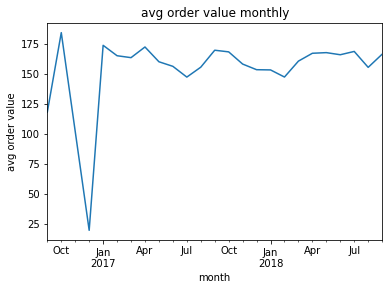

In [148]:
average_order_value_monthly.plot(kind='line')
plt.xlabel('month')
plt.ylabel('avg order value')
plt.title('avg order value monthly')
plt.show()

In [196]:
average_order_value_by_month = orders_data1.groupby(orders_data1['order_purchase_timestamp'].dt.month)['amount'].mean()
average_order_value_by_month.reset_index().sort_values(by='amount',ascending=False)

,order_purchase_timestamp,amount
8,9,169.748086
9,10,169.426007
3,4,168.591987
4,5,165.126298
5,6,162.700240
2,3,161.478829
6,7,160.486199
10,11,158.253090
7,8,155.561942
0,1,155.386488


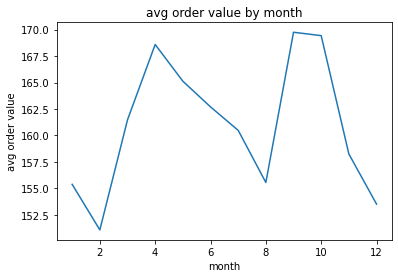

In [150]:
average_order_value_by_month.plot(kind='line')
plt.xlabel('month')
plt.ylabel('avg order value')
plt.title('avg order value by month')
plt.show()

4. sales weekly 

In [151]:
sales_weekly = orders_data1.groupby(orders_data1['order_purchase_timestamp'].dt.to_period('W'))['amount'].sum()
sales_weekly

order_purchase_timestamp
2016-08-29/2016-09-04       136.23
2016-09-05/2016-09-11        75.06
2016-09-12/2016-09-18       143.46
2016-09-26/2016-10-02       109.34
2016-10-03/2016-10-09     52206.11
                           ...    
2018-08-06/2018-08-12    329140.93
2018-08-13/2018-08-19    288227.83
2018-08-20/2018-08-26    146870.04
2018-08-27/2018-09-02     11995.53
2018-09-03/2018-09-09       166.46
Freq: W-SUN, Name: amount, Length: 95, dtype: float64

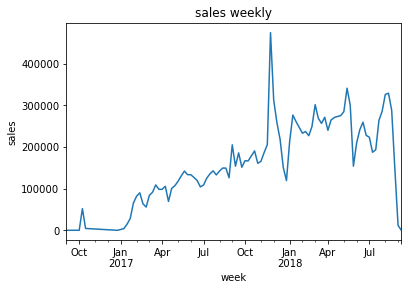

In [152]:
sales_weekly.plot(kind='line')
plt.xlabel('week')
plt.ylabel('sales')
plt.title('sales weekly')
plt.show()

In [154]:
# Top10 weeks by sales
sales_weekly.reset_index().sort_values(['amount'], ascending=[False]).head(10)

,order_purchase_timestamp,amount
53,2017-11-20/2017-11-26,474623.65
77,2018-05-07/2018-05-13,341185.50
90,2018-08-06/2018-08-12,329140.93
89,2018-07-30/2018-08-05,326290.40
54,2017-11-27/2017-12-03,312437.42
67,2018-02-26/2018-03-04,301730.51
78,2018-05-14/2018-05-20,300278.19
91,2018-08-13/2018-08-19,288227.83
88,2018-07-23/2018-07-29,285620.90
76,2018-04-30/2018-05-06,284914.81


In [195]:
# Avg sales by week
var_3 = sales_weekly.reset_index()
var_3['week'] = var_3.order_purchase_timestamp.dt.week
var_4 = var_3.groupby('week')['amount'].mean()
var_4.reset_index().sort_values(by='amount',ascending=False)

,week,amount
46,47,474623.650
47,48,312437.420
48,49,258850.660
31,32,239322.195
18,19,235918.650
30,31,234272.135
19,20,221278.690
32,33,218816.265
49,50,218401.000
29,30,209331.475


In [156]:
# Top 10 weeks by average weekly sales
var_4.reset_index().sort_values(['amount'], ascending=[False]).head(10)

,week,amount
46,47,474623.650
47,48,312437.420
48,49,258850.660
31,32,239322.195
18,19,235918.650
30,31,234272.135
19,20,221278.690
32,33,218816.265
49,50,218401.000
29,30,209331.475


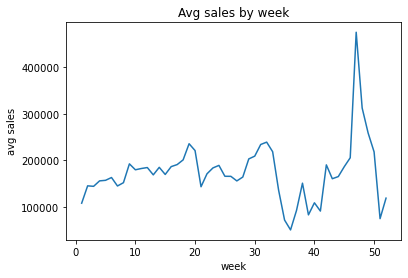

In [157]:
var_4.plot(kind='line')
plt.xlabel('week')
plt.ylabel('avg sales')
plt.title('Avg sales by week')
plt.show()

In [158]:
average_order_value_weekly = orders_data1.groupby(orders_data1['order_purchase_timestamp'].dt.to_period('W'))['amount'].mean()
average_order_value_weekly

order_purchase_timestamp
2016-08-29/2016-09-04    136.230000
2016-09-05/2016-09-11     75.060000
2016-09-12/2016-09-18    143.460000
2016-09-26/2016-10-02    109.340000
2016-10-03/2016-10-09    193.355963
                            ...    
2018-08-06/2018-08-12    166.907165
2018-08-13/2018-08-19    154.877931
2018-08-20/2018-08-26    138.687479
2018-08-27/2018-09-02    103.409741
2018-09-03/2018-09-09    166.460000
Freq: W-SUN, Name: amount, Length: 95, dtype: float64

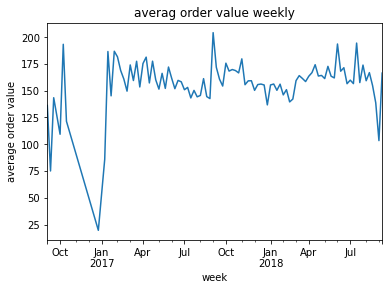

In [159]:
average_order_value_weekly.plot(kind='line')
plt.xlabel('week')
plt.ylabel('average order value')
plt.title('averag order value weekly')
plt.show()

In [193]:
average_order_value_by_week = orders_data1.groupby(orders_data1['order_purchase_timestamp'].dt.isocalendar().week)['amount'].mean()
average_order_value_by_week.reset_index().sort_values(by='amount',ascending=False)

,week,amount
34,35,193.756176
21,22,179.781813
43,44,179.761401
38,39,175.651807
39,40,173.700016
35,36,171.788696
18,19,170.893625
13,14,170.767992
14,15,170.536236
27,28,169.510906


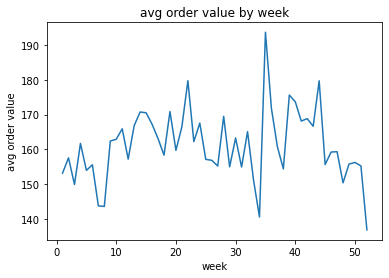

In [194]:
average_order_value_by_week.plot(kind='line')
plt.xlabel('week')
plt.ylabel('avg order value')
plt.title('avg order value by week')
plt.show()

5. Sales daily

In [162]:
sales_daily = orders_data1.groupby(orders_data1['order_purchase_timestamp'].dt.to_period('D'))['amount'].sum()
sales_daily

order_purchase_timestamp
2016-09-04     136.23
2016-09-05      75.06
2016-09-15     143.46
2016-10-02     109.34
2016-10-03     595.14
               ...   
2018-08-26    9333.16
2018-08-27    6111.61
2018-08-28    4121.22
2018-08-29    1762.70
2018-09-03     166.46
Freq: D, Name: amount, Length: 616, dtype: float64

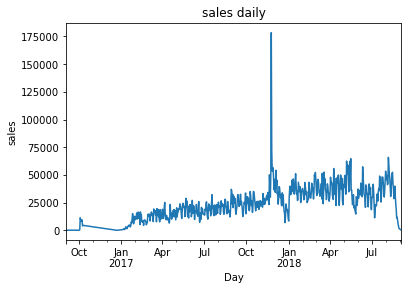

In [163]:
sales_daily.plot(kind='line')
plt.xlabel('Day')
plt.ylabel('sales')
plt.title('sales daily')
plt.show()

In [198]:
# Avg sales by day
var_5 = sales_daily.reset_index()
var_5['day'] = var_5.order_purchase_timestamp.dt.day
var_6 = var_5.groupby('day')['amount'].mean()
var_6.reset_index().sort_values(by='amount',ascending=False)

,day,amount
23,24,30004.755500
15,16,28753.454500
17,18,28584.559500
0,1,27342.870000
10,11,27196.143500
5,6,27082.650952
3,4,27075.353333
13,14,26608.280000
14,15,26446.100000
18,19,26252.480500


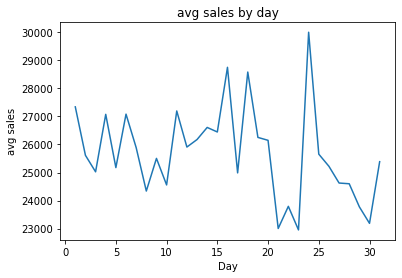

In [199]:
var_6.plot(kind='line')
plt.xlabel('Day')
plt.ylabel('avg sales')
plt.title('avg sales by day')
plt.show()

In [124]:
average_order_value_daily = orders_data1.groupby(orders_data1['order_purchase_timestamp'].dt.to_period('D'))['amount'].mean()
average_order_value_daily

order_purchase_timestamp
2016-09-04    136.230000
2016-09-05     75.060000
2016-09-15    143.460000
2016-10-02    109.340000
2016-10-03     74.392500
                 ...    
2018-08-26    127.851507
2018-08-27     92.600152
2018-08-28    105.672308
2018-08-29    160.245455
2018-09-03    166.460000
Freq: D, Name: amount, Length: 616, dtype: float64

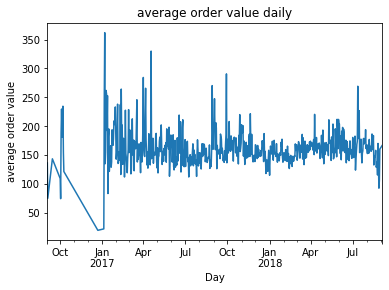

In [125]:
average_order_value_daily.plot(kind='line')
plt.xlabel('Day')
plt.ylabel('average order value')
plt.title('average order value daily')
plt.show()

In [200]:
average_order_value_by_day = orders_data1.groupby(orders_data1['order_purchase_timestamp'].dt.day)['amount'].mean()
average_order_value_by_day.reset_index().sort_values(by='amount',ascending=False)

,order_purchase_timestamp,amount
28,29,168.948745
0,1,168.673549
30,31,167.818419
17,18,167.602225
5,6,166.054210
10,11,165.880717
8,9,165.352578
3,4,164.377687
27,28,164.320665
9,10,164.287805


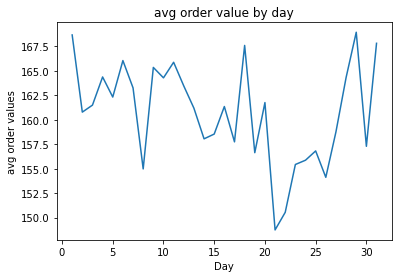

In [201]:
average_order_value_by_day.plot(kind='line')
plt.xlabel('Day')
plt.ylabel('avg order values')
plt.title('avg order value by day')
plt.show()

6. Sales hourly

In [183]:
sales_hourly = orders_data1.groupby(orders_data1['order_purchase_timestamp'].dt.to_period('H'))['amount'].sum()
sales_hourly

order_purchase_timestamp
2016-09-04 21:00    136.23
2016-09-05 00:00     75.06
2016-09-15 12:00    143.46
2016-10-02 22:00    109.34
2016-10-03 09:00     45.46
                     ...  
2018-08-29 11:00    119.42
2018-08-29 12:00     73.10
2018-08-29 14:00    605.48
2018-08-29 15:00     93.75
2018-09-03 09:00    166.46
Freq: H, Name: amount, Length: 12079, dtype: float64

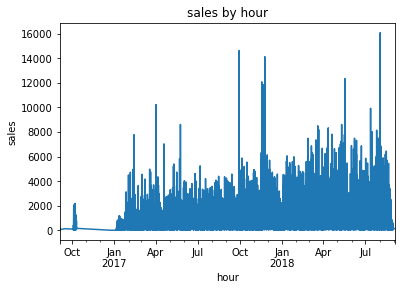

In [184]:
sales_hourly.plot(kind='line')
plt.xlabel('hour')
plt.ylabel('sales')
plt.title('sales by hour')
plt.show()

In [202]:
# Avg sales by hour
var_7 = sales_hourly.reset_index()
var_7['hour'] = var_7.order_purchase_timestamp.dt.hour
var_8 = var_7.groupby('hour')['amount'].mean()
var_8.reset_index().sort_values(by='amount',ascending=False)

,hour,amount
14,14,1837.634508
16,16,1820.089215
15,15,1754.977967
11,11,1725.252833
13,13,1701.634204
20,20,1678.481062
12,12,1660.070993
10,10,1648.601943
17,17,1640.652496
21,21,1636.920638


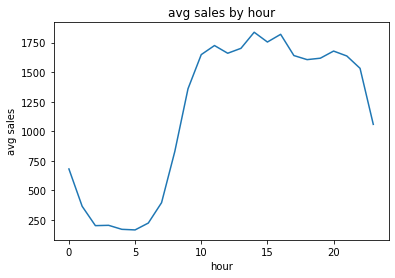

In [203]:
var_8.plot(kind='line')
plt.xlabel('hour')
plt.ylabel('avg sales')
plt.title('avg sales by hour')
plt.show()

In [132]:
average_order_value_hourly = orders_data1.groupby(orders_data1['order_purchase_timestamp'].dt.to_period('H'))['amount'].mean()
average_order_value_hourly

order_purchase_timestamp
2016-09-04 21:00    136.230000
2016-09-05 00:00     75.060000
2016-09-15 12:00    143.460000
2016-10-02 22:00    109.340000
2016-10-03 09:00     45.460000
                       ...    
2018-08-29 11:00    119.420000
2018-08-29 12:00     73.100000
2018-08-29 14:00    201.826667
2018-08-29 15:00     93.750000
2018-09-03 09:00    166.460000
Freq: H, Name: amount, Length: 12079, dtype: float64

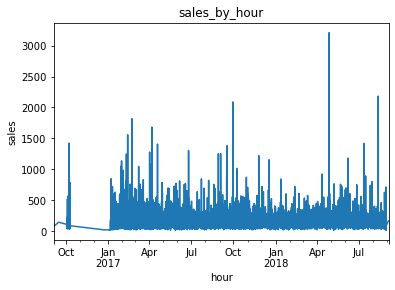

In [133]:
average_order_value_hourly.plot(kind='line')
plt.xlabel('hour')
plt.ylabel('sales')
plt.title('sales_by_hour')
plt.show()

In [204]:
average_order_value_by_hour = orders_data1.groupby(orders_data1['order_purchase_timestamp'].dt.hour)['amount'].mean()
average_order_value_by_hour.reset_index().sort_values(by='amount',ascending=False)

,order_purchase_timestamp,amount
14,14,168.799735
9,9,166.895989
18,18,166.469897
12,12,165.811698
15,15,164.606344
16,16,164.489053
20,20,162.001834
19,19,161.661411
17,17,160.437271
10,10,159.681340


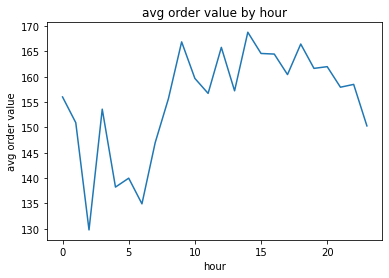

In [205]:
average_order_value_by_hour.plot(kind='line')
plt.xlabel('hour')
plt.ylabel('avg order value')
plt.title('avg order value by hour')
plt.show()

7. Sales by day of the week

In [136]:
# Calculate the average dales per day of the week
average_order_value_dayofweek = orders_data1.groupby(orders_data1['order_purchase_timestamp'].dt.dayofweek)['amount'].mean()
average_order_value_dayofweek

order_purchase_timestamp
0    161.845520
1    159.953769
2    159.914563
3    160.638309
4    162.971791
5    162.034171
6    156.335672
Name: amount, dtype: float64

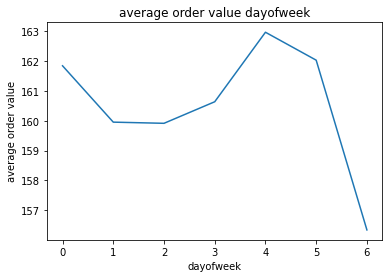

In [137]:
average_order_value_dayofweek.plot(kind='line')
plt.xlabel('dayofweek')
plt.ylabel('average order value')
plt.title('average order value dayofweek')
plt.show()

8. Sales by payment method

In [138]:
sales_by_payment_method = payments.groupby('payment_type')['payment_value'].sum()
sales_by_payment_method

payment_type
UPI             2869361.27
credit_card    12542084.19
debit_card       217989.79
voucher          379436.87
Name: payment_value, dtype: float64

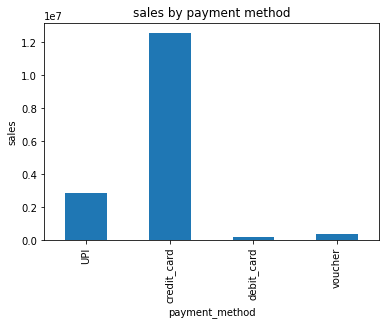

In [139]:
sales_by_payment_method.plot(kind='bar')
plt.xlabel('payment_method')
plt.ylabel('sales')
plt.title('sales by payment method')
plt.show()

B. calculate Quantity by category, location, month, week, day, time, channel, and payment method

1. Quantity by category

In [206]:
quantity_by_category = orders_data.groupby('product_category_name')['order_item_qty'].sum()
quantity_by_category

product_category_name
Agro_Industry_And_Commerce     212
Air_Conditioning               297
Art                            209
Arts_And_Craftmanship           24
Audio                          364
                              ... 
Stationery                    2517
Tablets_Printing_Image          83
Telephony                     4545
Toys                          4117
Watches_Gifts                 5991
Name: order_item_qty, Length: 71, dtype: int64

In [207]:
quantity_by_category_T10 = orders_data.groupby('product_category_name')['order_item_qty'].sum().reset_index().sort_values(['order_item_qty'], ascending=[False]).head(10)
quantity_by_category_T10

,product_category_name,order_item_qty
7,Bed_Bath_Table,11115
43,Health_Beauty,9670
65,Sports_Leisure,8641
39,Furniture_Decor,8334
15,Computers_Accessories,7827
49,Housewares,6964
70,Watches_Gifts,5991
68,Telephony,4545
42,Garden_Tools,4347
5,Auto,4235


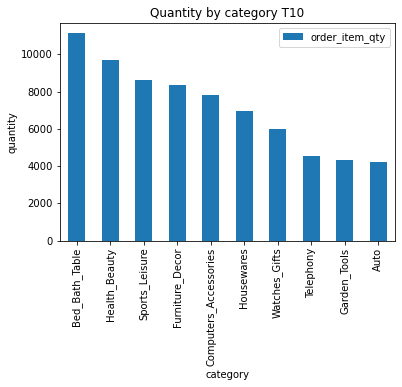

In [208]:
quantity_by_category_T10.plot(x='product_category_name',kind='bar')
plt.xlabel('category')
plt.ylabel('quantity')
plt.title('Quantity by category T10')
plt.show()

2. Quantity by location

In [209]:
quantity_by_location = orders_data.groupby('customer_zip_code_prefix')['order_item_qty'].sum()
quantity_by_location

customer_zip_code_prefix
1003     1
1004     2
1005     6
1006     2
1007     4
        ..
99960    1
99965    2
99970    1
99980    3
99990    1
Name: order_item_qty, Length: 14976, dtype: int64

In [210]:
quantity_by_state = orders_data.groupby('customer_state')['order_item_qty'].sum()
quantity_by_state

customer_state
Andhra Pradesh       69093
Arunachal Pradesh     1258
Chhattisgarh          7106
Delhi                 3751
Goa                     10
Gujarat               8499
Haryana               2488
Himachal Pradesh       837
Jammu & Kashmir       1752
Karnataka             4345
Kerala                1709
Madhya Pradesh        3226
Maharashtra           2246
Orissa                 677
Punjab                 741
Rajasthan              895
Tamil Nadu            2358
Uttar Pradesh         1135
Uttaranchal            106
West Bengal            418
Name: order_item_qty, dtype: int64

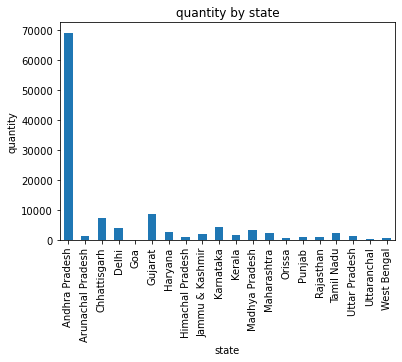

In [211]:
quantity_by_state.plot(kind='bar')
plt.xlabel('state')
plt.ylabel('quantity')
plt.title('quantity by state')
plt.show()

3. Quantity monthly

In [212]:
orders_data2 = orders_data.groupby(['order_purchase_timestamp','order_id'])['order_item_qty'].sum().reset_index()
orders_data2

,order_purchase_timestamp,order_id,order_item_qty
0,2016-09-04 21:15:00,2e7a8482f6fb09756ca50c10d7bfc047,2
1,2016-09-05 00:15:00,e5fa5a7210941f7d56d0208e4e071d35,1
2,2016-09-15 12:16:00,bfbd0f9bdef84302105ad712db648a6c,3
3,2016-10-02 22:07:00,71303d7e93b399f5bcd537d124c0bcfa,1
4,2016-10-03 09:44:00,3b697a20d9e427646d92567910af6d57,1
...,...,...,...
98661,2018-08-29 14:18:00,0b223d92c27432930dfe407c6aea3041,2
98662,2018-08-29 14:18:00,168626408cb32af0ffaf76711caae1dc,1
98663,2018-08-29 14:52:00,03ef5dedbe7492bdae72eec50764c43f,1
98664,2018-08-29 15:00:00,35a972d7f8436f405b56e36add1a7140,1


In [213]:
quantity_monthly = orders_data2.groupby(orders_data2['order_purchase_timestamp'].dt.to_period('M'))['order_item_qty'].sum()
quantity_monthly

order_purchase_timestamp
2016-09       6
2016-10     363
2016-12       1
2017-01     955
2017-02    1951
2017-03    3000
2017-04    2684
2017-05    4136
2017-06    3583
2017-07    4519
2017-08    4910
2017-09    4831
2017-10    5322
2017-11    8665
2017-12    6308
2018-01    8208
2018-02    7672
2018-03    8217
2018-04    7975
2018-05    7925
2018-06    7078
2018-07    7092
2018-08    7248
2018-09       1
Freq: M, Name: order_item_qty, dtype: int64

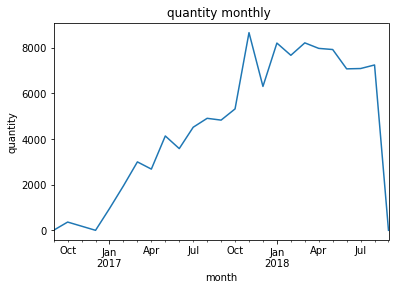

In [214]:
quantity_monthly .plot(kind='line')
plt.xlabel('month')
plt.ylabel('quantity')
plt.title('quantity monthly ')
plt.show()

In [215]:
# Avg quantity by month
var_9 = quantity_monthly.reset_index()
var_9['month'] = var_9.order_purchase_timestamp.dt.month
var_10 = var_9.groupby('month')['order_item_qty'].mean()
var_10

month
1     4581.500000
2     4811.500000
3     5608.500000
4     5329.500000
5     6030.500000
6     5330.500000
7     5805.500000
8     6079.000000
9     1612.666667
10    2842.500000
11    8665.000000
12    3154.500000
Name: order_item_qty, dtype: float64

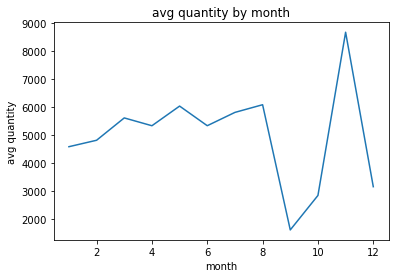

In [216]:
var_10.plot(kind='line')
plt.xlabel('month')
plt.ylabel('avg quantity')
plt.title('avg quantity by month')
plt.show()

In [217]:
average_order_quantity_monthly = orders_data2.groupby(orders_data2['order_purchase_timestamp'].dt.to_period('M'))['order_item_qty'].mean()
average_order_quantity_monthly

order_purchase_timestamp
2016-09    2.000000
2016-10    1.178571
2016-12    1.000000
2017-01    1.210393
2017-02    1.125793
2017-03    1.135933
2017-04    1.122543
2017-05    1.130055
2017-06    1.113771
2017-07    1.138574
2017-08    1.143722
2017-09    1.138581
2017-10    1.165061
2017-11    1.162931
2017-12    1.121622
2018-01    1.136842
2018-02    1.146101
2018-03    1.143155
2018-04    1.150130
2018-05    1.156428
2018-06    1.149026
2018-07    1.130560
2018-08    1.123373
2018-09    1.000000
Freq: M, Name: order_item_qty, dtype: float64

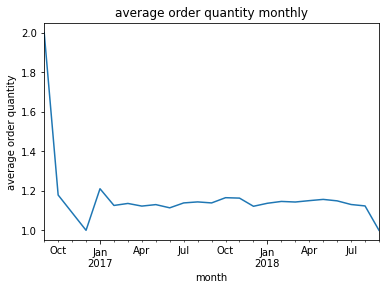

In [218]:
average_order_quantity_monthly.plot(kind='line')
plt.xlabel('month')
plt.ylabel('average order quantity')
plt.title('average order quantity monthly')
plt.show()

In [219]:
average_order_quantity_by_month = orders_data2.groupby(orders_data2['order_purchase_timestamp'].dt.month)['order_item_qty'].mean()
average_order_quantity_by_month

order_purchase_timestamp
1     1.144088
2     1.141925
3     1.141215
4     1.143056
5     1.147246
6     1.136931
7     1.133665
8     1.131503
9     1.139157
10    1.165915
11    1.162931
12    1.121600
Name: order_item_qty, dtype: float64

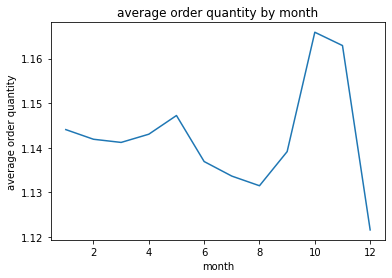

In [220]:
average_order_quantity_by_month.plot(kind='line')
plt.xlabel('month')
plt.ylabel('average order quantity')
plt.title('average order quantity by month')
plt.show()

4. Quantity weekly

In [221]:
quantity_weekly = orders_data2.groupby(orders_data2['order_purchase_timestamp'].dt.to_period('W'))['order_item_qty'].sum()
quantity_weekly

order_purchase_timestamp
2016-08-29/2016-09-04       2
2016-09-05/2016-09-11       1
2016-09-12/2016-09-18       3
2016-09-26/2016-10-02       1
2016-10-03/2016-10-09     322
                         ... 
2018-08-06/2018-08-12    2254
2018-08-13/2018-08-19    2054
2018-08-20/2018-08-26    1192
2018-08-27/2018-09-02     132
2018-09-03/2018-09-09       1
Freq: W-SUN, Name: order_item_qty, Length: 95, dtype: int64

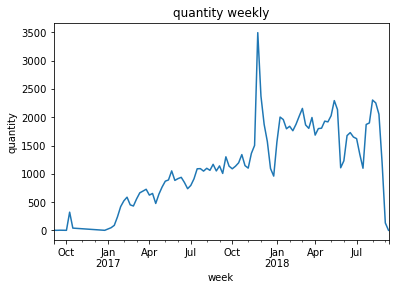

In [222]:
quantity_weekly.plot(kind='line')
plt.xlabel('week')
plt.ylabel('quantity')
plt.title('quantity weekly')
plt.show()

In [223]:
# Avg quantity by week
var_11 = quantity_weekly.reset_index()
var_11['week'] = var_11.order_purchase_timestamp.dt.week
var_12 = var_11.groupby('week')['order_item_qty'].mean()
var_12

week
1      804.000000
2     1046.500000
3     1099.500000
4     1108.500000
5     1181.500000
6     1174.500000
7     1164.000000
8     1225.500000
9     1357.000000
10    1264.500000
11    1249.500000
12    1361.500000
13    1154.500000
14    1226.500000
15    1141.500000
16    1286.500000
17    1343.000000
18    1449.000000
19    1593.500000
20    1594.000000
21     995.500000
22    1073.000000
23    1307.000000
24    1288.000000
25    1194.000000
26    1208.500000
27    1128.500000
28    1094.000000
29    1482.500000
30    1474.000000
31    1701.500000
32    1658.000000
33    1611.000000
34    1121.500000
35     424.666667
36     336.333333
37     652.000000
38    1136.000000
39     545.000000
40     728.000000
41     617.500000
42    1340.000000
43    1145.000000
44    1101.000000
45    1362.000000
46    1502.000000
47    3497.000000
48    2374.000000
49    1875.000000
50    1571.000000
51     547.500000
52     960.000000
Name: order_item_qty, dtype: float64

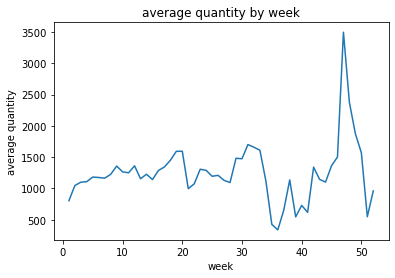

In [224]:
var_12.plot(kind='line')
plt.xlabel('week')
plt.ylabel('average quantity')
plt.title('average quantity by week')
plt.show()

In [225]:
average_order_quantity_weekly = orders_data2.groupby(orders_data2['order_purchase_timestamp'].dt.to_period('W'))['order_item_qty'].mean()
average_order_quantity_weekly

order_purchase_timestamp
2016-08-29/2016-09-04    2.000000
2016-09-05/2016-09-11    1.000000
2016-09-12/2016-09-18    3.000000
2016-09-26/2016-10-02    1.000000
2016-10-03/2016-10-09    1.192593
                           ...   
2018-08-06/2018-08-12    1.143002
2018-08-13/2018-08-19    1.103708
2018-08-20/2018-08-26    1.125590
2018-08-27/2018-09-02    1.137931
2018-09-03/2018-09-09    1.000000
Freq: W-SUN, Name: order_item_qty, Length: 95, dtype: float64

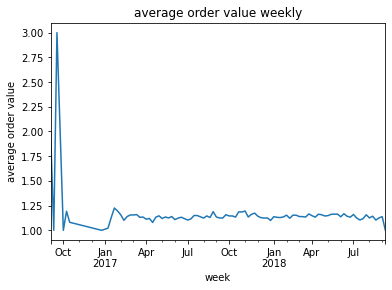

In [226]:
average_order_quantity_weekly.plot(kind='line')
plt.xlabel('week')
plt.ylabel('average order value')
plt.title('average order value weekly')
plt.show()

In [227]:
average_order_quantity_by_week = orders_data2.groupby(orders_data2['order_purchase_timestamp'].dt.isocalendar().week)['order_item_qty'].mean()
average_order_quantity_by_week

week
1     1.133992
2     1.131351
3     1.138788
4     1.146329
5     1.154372
6     1.116976
7     1.150198
8     1.153412
9     1.142737
10    1.143826
11    1.133848
12    1.157246
13    1.137999
14    1.129894
15    1.144361
16    1.151230
17    1.145416
18    1.139599
19    1.154292
20    1.150487
21    1.152866
22    1.124738
23    1.151542
24    1.138815
25    1.128544
26    1.141171
27    1.120655
28    1.126674
29    1.129524
30    1.149766
31    1.124959
32    1.143843
33    1.112953
34    1.154400
35    1.135472
36    1.124861
37    1.126079
38    1.158002
39    1.144958
40    1.155556
41    1.131989
42    1.186891
43    1.185300
44    1.195440
45    1.135000
46    1.161640
47    1.173884
48    1.142445
49    1.128159
50    1.123748
51    1.125385
52    1.099656
Name: order_item_qty, dtype: float64

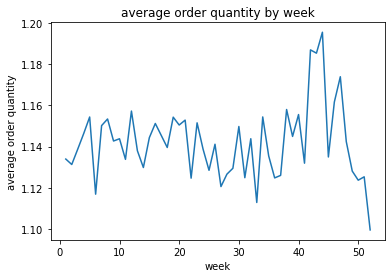

In [228]:
average_order_quantity_by_week.plot(kind='line')
plt.xlabel('week')
plt.ylabel('average order quantity')
plt.title('average order quantity by week')
plt.show()

5. Quantity by day 

In [229]:
quantity_daily = orders_data2.groupby(orders_data2['order_purchase_timestamp'].dt.to_period('D'))['order_item_qty'].sum()
quantity_daily

order_purchase_timestamp
2016-09-04     2
2016-09-05     1
2016-09-15     3
2016-10-02     1
2016-10-03     8
              ..
2018-08-26    82
2018-08-27    71
2018-08-28    45
2018-08-29    16
2018-09-03     1
Freq: D, Name: order_item_qty, Length: 616, dtype: int64

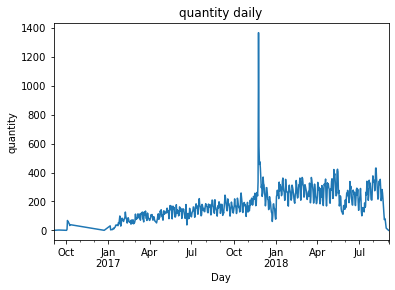

In [230]:
quantity_daily.plot(kind='line')
plt.xlabel('Day')
plt.ylabel('quantity')
plt.title('quantity daily')
plt.show()

In [231]:
# Avg quantity by day
var_13 = quantity_daily.reset_index()
var_13['day'] = var_13.order_purchase_timestamp.dt.day
var_14 = var_13.groupby('day')['order_item_qty'].mean()
var_14

day
1     183.315789
2     181.450000
3     174.380952
4     184.047619
5     178.727273
6     187.047619
7     180.047619
8     178.380952
9     174.904762
10    168.904762
11    185.300000
12    181.000000
13    186.700000
14    190.550000
15    188.809524
16    203.650000
17    180.250000
18    194.100000
19    193.450000
20    185.750000
21    175.000000
22    184.300000
23    171.380952
24    219.650000
25    188.200000
26    189.300000
27    181.100000
28    169.900000
29    161.833333
30    167.823529
31    173.636364
Name: order_item_qty, dtype: float64

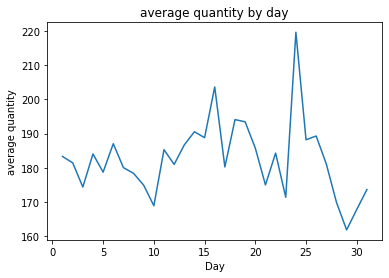

In [232]:
var_14.plot(kind='line')
plt.xlabel('Day')
plt.ylabel('average quantity')
plt.title('average quantity by day')
plt.show()

In [233]:
average_order_quantity_daily = orders_data2.groupby(orders_data2['order_purchase_timestamp'].dt.to_period('D'))['order_item_qty'].mean()
average_order_quantity_daily

order_purchase_timestamp
2016-09-04    2.000000
2016-09-05    1.000000
2016-09-15    3.000000
2016-10-02    1.000000
2016-10-03    1.000000
                ...   
2018-08-26    1.123288
2018-08-27    1.075758
2018-08-28    1.153846
2018-08-29    1.454545
2018-09-03    1.000000
Freq: D, Name: order_item_qty, Length: 616, dtype: float64

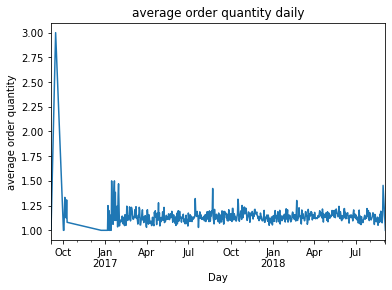

In [234]:
average_order_quantity_daily.plot(kind='line')
plt.xlabel('Day')
plt.ylabel('average order quantity')
plt.title('average order quantity daily')
plt.show()

In [235]:
average_order_quantity_by_day = orders_data2.groupby(orders_data2['order_purchase_timestamp'].dt.day)['order_item_qty'].mean()
average_order_quantity_by_day

order_purchase_timestamp
1     1.130844
2     1.139046
3     1.125384
4     1.117375
5     1.152403
6     1.146861
7     1.135435
8     1.135840
9     1.133992
10    1.129978
11    1.130223
12    1.141956
13    1.149631
14    1.131868
15    1.131887
16    1.142817
17    1.137942
18    1.138083
19    1.154236
20    1.149088
21    1.131587
22    1.166087
23    1.160593
24    1.141039
25    1.150367
26    1.156737
27    1.167634
28    1.134937
29    1.150020
30    1.138468
31    1.147837
Name: order_item_qty, dtype: float64

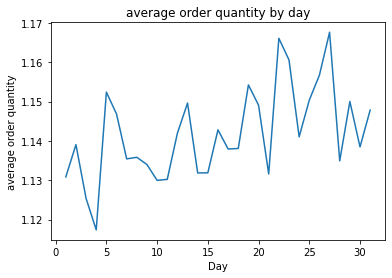

In [236]:
average_order_quantity_by_day.plot(kind='line')
plt.xlabel('Day')
plt.ylabel('average order quantity')
plt.title('average order quantity by day')
plt.show()

6. Quantity by hour

In [237]:
quantity_hourly = orders_data2.groupby(orders_data2['order_purchase_timestamp'].dt.to_period('H'))['order_item_qty'].sum()
quantity_hourly

order_purchase_timestamp
2016-09-04 21:00    2
2016-09-05 00:00    1
2016-09-15 12:00    3
2016-10-02 22:00    1
2016-10-03 09:00    1
                   ..
2018-08-29 11:00    1
2018-08-29 12:00    1
2018-08-29 14:00    4
2018-08-29 15:00    1
2018-09-03 09:00    1
Freq: H, Name: order_item_qty, Length: 12079, dtype: int64

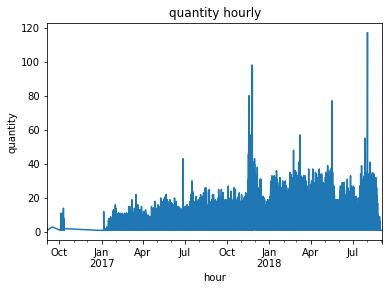

In [238]:
quantity_hourly.plot(kind='line')
plt.xlabel('hour')
plt.ylabel('quantity')
plt.title('quantity hourly')
plt.show()

In [239]:
# Avg quantity by hour
var_15 = quantity_hourly.reset_index()
var_15['hour'] = var_15.order_purchase_timestamp.dt.hour
var_16 = var_15.groupby('hour')['order_item_qty'].mean()
var_16

hour
0      4.994485
1      2.707983
2      1.808050
3      1.562189
4      1.478788
5      1.388535
6      1.853333
7      3.039735
8      6.106691
9      9.378657
10    11.881757
11    12.532884
12    11.479798
13    12.400335
14    12.629382
15    12.283333
16    12.776294
17    11.742044
18    11.026936
19    11.344595
20    11.593592
21    11.610738
22    10.919866
23     7.981067
Name: order_item_qty, dtype: float64

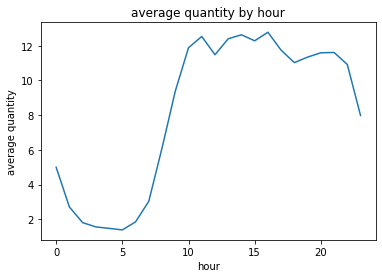

In [240]:
var_16.plot(kind='line')
plt.xlabel('hour')
plt.ylabel('average quantity')
plt.title('average quantity by hour')
plt.show()

In [241]:
average_order_quantity_hourly = orders_data2.groupby(orders_data2['order_purchase_timestamp'].dt.to_period('H'))['order_item_qty'].mean()
average_order_quantity_hourly

order_purchase_timestamp
2016-09-04 21:00    2.000000
2016-09-05 00:00    1.000000
2016-09-15 12:00    3.000000
2016-10-02 22:00    1.000000
2016-10-03 09:00    1.000000
                      ...   
2018-08-29 11:00    1.000000
2018-08-29 12:00    1.000000
2018-08-29 14:00    1.333333
2018-08-29 15:00    1.000000
2018-09-03 09:00    1.000000
Freq: H, Name: order_item_qty, Length: 12079, dtype: float64

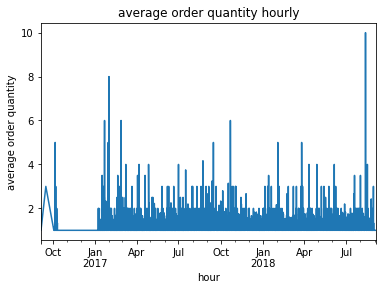

In [242]:
average_order_quantity_hourly.plot(kind='line')
plt.xlabel('hour')
plt.ylabel('average order quantity')
plt.title('average order quantity hourly')
plt.show()

In [243]:
average_order_quantity_by_hour = orders_data2.groupby(orders_data2['order_purchase_timestamp'].dt.hour)['order_item_qty'].mean()
average_order_quantity_by_hour

order_purchase_timestamp
0     1.142557
1     1.115052
2     1.156436
3     1.167286
4     1.190244
5     1.165775
6     1.112000
7     1.125920
8     1.146689
9     1.150792
10    1.150851
11    1.138480
12    1.146629
13    1.145798
14    1.160098
15    1.152103
16    1.154647
17    1.148239
18    1.142907
19    1.133311
20    1.118978
21    1.120285
22    1.129316
23    1.132633
Name: order_item_qty, dtype: float64

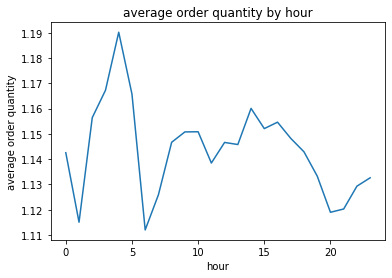

In [244]:
average_order_quantity_by_hour.plot(kind='line')
plt.xlabel('hour')
plt.ylabel('average order quantity')
plt.title('average order quantity by hour')
plt.show()

7. Quantity by payment method

In [245]:
payments

,order_id,payment_type,payment_sequential,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,1,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,1,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,1,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,credit_card,1,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,credit_card,1,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,UPI,1,1,363.31
103882,7b905861d7c825891d6347454ea7863f,credit_card,1,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,credit_card,1,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,credit_card,1,5,369.54


In [246]:
payments_1 = payments.groupby(['order_id','payment_type']).agg({'payment_value': 'sum'}).reset_index()
payments_1

,order_id,payment_type,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,credit_card,72.19
1,00018f77f2f0320c557190d7a144bdd3,credit_card,259.83
2,000229ec398224ef6ca0657da4fc703e,credit_card,216.87
3,00024acbcdf0a6daa1e931b038114c75,credit_card,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,credit_card,218.04
...,...,...,...
101678,fffc94f6ce00a00581880bf54a75a037,UPI,343.40
101679,fffcd46ef2263f404302a634eb57f7eb,UPI,386.53
101680,fffce4705a9662cd70adb13d4a31832d,credit_card,116.85
101681,fffe18544ffabc95dfada21779c9644f,credit_card,64.71


In [247]:
orders1 = orders_data.groupby('order_id').order_item_qty.sum().reset_index()
orders1

,order_id,order_item_qty
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,1
98662,fffcd46ef2263f404302a634eb57f7eb,1
98663,fffce4705a9662cd70adb13d4a31832d,1
98664,fffe18544ffabc95dfada21779c9644f,1


In [248]:
pay = payments_1.drop_duplicates( subset =['order_id'], keep = 'first')
pay

,order_id,payment_type,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,credit_card,72.19
1,00018f77f2f0320c557190d7a144bdd3,credit_card,259.83
2,000229ec398224ef6ca0657da4fc703e,credit_card,216.87
3,00024acbcdf0a6daa1e931b038114c75,credit_card,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,credit_card,218.04
...,...,...,...
101678,fffc94f6ce00a00581880bf54a75a037,UPI,343.40
101679,fffcd46ef2263f404302a634eb57f7eb,UPI,386.53
101680,fffce4705a9662cd70adb13d4a31832d,credit_card,116.85
101681,fffe18544ffabc95dfada21779c9644f,credit_card,64.71


In [249]:
ord_pay = pd.merge(orders1,pay,how='left',on='order_id')
ord_pay

,order_id,order_item_qty,payment_type,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,credit_card,259.83
2,000229ec398224ef6ca0657da4fc703e,1,credit_card,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,credit_card,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,credit_card,218.04
...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,1,UPI,343.40
98662,fffcd46ef2263f404302a634eb57f7eb,1,UPI,386.53
98663,fffce4705a9662cd70adb13d4a31832d,1,credit_card,116.85
98664,fffe18544ffabc95dfada21779c9644f,1,credit_card,64.71


In [250]:
quantity_by_payment_method = ord_pay.groupby('payment_type')['order_item_qty'].sum()
quantity_by_payment_method

payment_type
UPI            22867
credit_card    86435
debit_card      1689
voucher         1656
Name: order_item_qty, dtype: int64

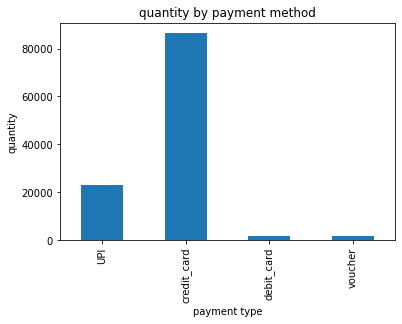

In [251]:
quantity_by_payment_method.plot(kind='bar')
plt.xlabel('payment type')
plt.ylabel('quantity')
plt.title('quantity by payment method')
plt.show()

f. Popular Products by month, seller, state, category.

Top-selling product by month, seller, state, and category 

1. Top-selling product by month

In [252]:
monthly_product_sales = orders_data.groupby([orders_data['order_purchase_timestamp'].dt.to_period('M'), 'product_id','product_category_name']).agg({'order_item_qty': 'sum','amount':'sum'}).rename(columns={'order_item_qty':'quantity', 'amount': 'revenue'}).reset_index()
monthly_product_sales = monthly_product_sales.sort_values(['order_purchase_timestamp', 'quantity'], ascending=[True, False])
# Top product by month
top_product_per_month = monthly_product_sales.groupby('order_purchase_timestamp').head(1)
top_product_per_month

,order_purchase_timestamp,product_id,product_category_name,quantity,revenue
0,2016-09,5a6b04657a4c5ee34285d1e4619a96b4,Health_Beauty,3,143.46
255,2016-10,eba7488e1c67729f045ab43fac426f2e,Perfumery,11,2958.39
276,2016-12,f5d8f4fbc70ca2a0038b9a0010ed5cb0,Fashion_Bags_Accessories,1,19.62
411,2017-01,37eb69aca8718e843d897aa7b82f462d,Garden_Tools,15,783.00
1669,2017-02,a703f5ade6e4fae527357132230ea778,Health_Beauty,13,492.04
2950,2017-03,7e0dc102074f8285580c9777f79c90cf,Garden_Tools,45,2221.63
4781,2017-04,99a4788cb24856965c36a24e339b6058,Bed_Bath_Table,34,3568.30
6840,2017-05,99a4788cb24856965c36a24e339b6058,Bed_Bath_Table,58,6084.89
8281,2017-06,42a2c92a0979a949ca4ea89ec5c7b934,Housewares,73,5660.69
11245,2017-07,99a4788cb24856965c36a24e339b6058,Bed_Bath_Table,60,6233.63


2. Top-selling product by seller

In [253]:
seller_product_sales = orders_data.groupby(['seller_id', 'product_id','product_category_name']).agg({'order_item_qty': 'sum','amount':'sum'}).rename(columns={'order_item_qty':'quantity', 'amount': 'revenue'}).reset_index()
seller_product_sales = seller_product_sales.sort_values(['seller_id','quantity'], ascending=[True, False])
# Top products sold by seller
top_product_by_seller = seller_product_sales.groupby('seller_id').head(1)
top_product_by_seller

,seller_id,product_id,product_category_name,quantity,revenue
0,0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8,Small_Appliances,3,2748.06
1,001cca7ae9ae17fb1caed9dfb1094831,08574b074924071f4e201e151b152b4e,Garden_Tools,113,15219.83
12,001e6ad469a905060d959994f1b41e4f,093cd981b714bcdff182b427d87fc8fc,Sports_Leisure,1,267.94
14,002100f778ceb8431b7a1020ff7ab48f,158102fe543dbaeb84d87811bfe06d0d,Furniture_Decor,17,564.74
62,004c9cd9d87a3c30c522c48c4fc07416,54af11c815f92135fb554bd9c97dd418,Bed_Bath_Table,13,1141.91
...,...,...,...,...,...
33766,ffcfefa19b08742c5d315f2791395ee5,cea898bfbca0b5b0e7b36cecd350709e,Books_General_Interest,1,79.52
33775,ffdd9f82b9a447f6f8d4b91554cc7dd3,ada800a927673ac73cdfbbd2c832331b,Housewares,5,386.13
33780,ffeee66ac5d5a62fe688b9d26f83f534,1347d4320dcd0acd750e37bb3d94a918,Home_Appliances,10,1607.60
33808,fffd5413c0700ac820c7069d66d98c89,ebb12274522d82caa7dca657873b2ad7,Housewares,6,831.74


3. Top-selling product by category

In [254]:
category_product_sales = orders_data.groupby(['product_category_name', 'product_id']).agg({'order_item_qty': 'sum','amount':'sum'}).rename(columns={'order_item_qty':'quantity', 'amount': 'revenue'}).reset_index()
category_product_sales = category_product_sales.sort_values(['product_category_name','quantity'], ascending=[True, False])
# Top product by each category
top_product_by_category = category_product_sales.groupby('product_category_name').head(1)
top_product_by_category

,product_category_name,product_id,quantity,revenue
7,Agro_Industry_And_Commerce,11250b0d4b709fee92441c5f34122aed,22,9710.48
144,Air_Conditioning,98e91d0f32954dcd8505875bb2b42cdb,17,1291.28
218,Art,4fe644d766c7566dbc46fb851363cb3b,107,12852.22
267,Arts_And_Craftmanship,b9976e9c22fb1540bd71d1bcd2989475,5,721.82
316,Audio,db5efde3ad0cc579b130d71c4b2db522,48,10231.39
...,...,...,...,...
28426,Stationery,fb55982be901439613a95940feefd9ee,84,8384.55
28449,Tablets_Printing_Image,6bbe55cf8f85c87b6eebb775a53402f4,33,2993.22
29470,Telephony,e7cc48a9daff5436f63d3aad9426f28b,93,18542.22
30360,Toys,880be32f4db1d9f6e2bec38fb6ac23ab,99,5776.26


4. Top-selling product by state

In [255]:
state_product_sales = orders_data.groupby(['customer_state', 'product_id','product_category_name']).agg({'order_item_qty': 'sum','amount':'sum'}).rename(columns={'order_item_qty':'quantity', 'amount': 'revenue'}).reset_index()
state_product_sales = state_product_sales.sort_values(['customer_state','quantity'], ascending=[True, False])
# Top product by state
top_product_by_state = state_product_sales.groupby('customer_state').head(1)
top_product_by_state

,customer_state,product_id,product_category_name,quantity,revenue
16049,Andhra Pradesh,aca2eb7d00ea1a7b8ebd4e68314663af,Furniture_Decor,345,29379.66
23839,Arunachal Pradesh,03e1c946c0ddfc58724ff262aef08dff,Housewares,12,441.72
25781,Chhattisgarh,368c6c730842d78016ad823897a372db,Garden_Tools,40,2842.55
30246,Delhi,53759a2ecddad2bb87a079a1f1519f73,Garden_Tools,22,1701.19
32003,Goa,2a5806f10d0f00e5ad032dd2e3c8806e,Office_Furniture,1,232.82
33687,Gujarat,53759a2ecddad2bb87a079a1f1519f73,Garden_Tools,45,3372.89
37513,Haryana,2b4609f8948be18874494203496bc318,Health_Beauty,13,1318.22
39203,Himachal Pradesh,422879e10f46682990de24d770e7f83d,Garden_Tools,6,445.03
40422,Jammu & Kashmir,89b190a046022486c635022524a974a8,Furniture_Decor,15,1225.65
41807,Karnataka,422879e10f46682990de24d770e7f83d,Garden_Tools,24,1857.69


g. Popular categories by state, month,seller

1. Top categories by state

In [256]:
top_categories_by_state = orders_data.groupby(['customer_state','product_category_name']).agg({'order_item_qty': 'sum','amount':'sum'}).rename(columns={'order_item_qty':'quantity', 'amount': 'revenue'}).reset_index()
top_categories_by_state = top_categories_by_state.sort_values(by=['customer_state','quantity'], ascending=[True,False])
top_categories_by_state = top_categories_by_state.groupby('customer_state').head(1)
top_categories_by_state

,customer_state,product_category_name,quantity,revenue
7,Andhra Pradesh,Bed_Bath_Table,7101,764975.87
77,Arunachal Pradesh,Bed_Bath_Table,114,14138.54
132,Chhattisgarh,Bed_Bath_Table,681,76985.73
229,Delhi,Health_Beauty,328,56154.17
255,Goa,Auto,1,134.83
272,Gujarat,Bed_Bath_Table,786,87937.60
339,Haryana,Bed_Bath_Table,282,33442.04
396,Himachal Pradesh,Bed_Bath_Table,83,10284.45
448,Jammu & Kashmir,Bed_Bath_Table,160,17874.44
505,Karnataka,Bed_Bath_Table,379,47494.35


2. Top categories by month

In [257]:
top_categories_by_month = orders_data.groupby([orders_data['order_purchase_timestamp'].dt.to_period('M'),'product_category_name']).agg({'order_item_qty': 'sum','amount':'sum'}).rename(columns={'order_item_qty':'quantity', 'amount': 'revenue'}).reset_index()
top_categories_by_month = top_categories_by_month.sort_values(by=['order_purchase_timestamp','quantity'], ascending=[True, False])
top_categories_by_month = top_categories_by_month.groupby(['order_purchase_timestamp']).head(1)
top_categories_by_month

,order_purchase_timestamp,product_category_name,quantity,revenue
1,2016-09,Health_Beauty,3,143.46
21,2016-10,Furniture_Decor,67,7052.28
34,2016-12,Fashion_Bags_Accessories,1,19.62
56,2017-01,Furniture_Decor,182,16461.75
105,2017-02,Furniture_Decor,266,26262.32
155,2017-03,Furniture_Decor,328,29506.43
187,2017-04,Bed_Bath_Table,274,29007.36
246,2017-05,Bed_Bath_Table,369,39705.14
303,2017-06,Bed_Bath_Table,382,41684.51
363,2017-07,Bed_Bath_Table,579,74629.84


3. Top categories by seller

In [258]:
top_categories_by_seller = orders_data.groupby(['seller_id','product_category_name']).agg({'order_item_qty': 'sum','amount':'sum'}).rename(columns={'order_item_qty':'quantity', 'amount': 'revenue'}).reset_index()
top_categories_by_seller = top_categories_by_seller.sort_values(by=['seller_id', 'quantity'], ascending=[True, False])
top_categories_by_seller = top_categories_by_seller.groupby(['seller_id']).head(1)
top_categories_by_seller

,seller_id,product_category_name,quantity,revenue
0,0015a82c2db000af6aaaf3ae2ecb0532,Small_Appliances,3,2748.06
2,001cca7ae9ae17fb1caed9dfb1094831,Garden_Tools,212,29739.35
3,001e6ad469a905060d959994f1b41e4f,Sports_Leisure,1,267.94
4,002100f778ceb8431b7a1020ff7ab48f,Furniture_Decor,55,2028.16
5,004c9cd9d87a3c30c522c48c4fc07416,Bed_Bath_Table,158,20888.29
...,...,...,...,...
6339,ffcfefa19b08742c5d315f2791395ee5,Books_General_Interest,1,79.52
6341,ffdd9f82b9a447f6f8d4b91554cc7dd3,Housewares,17,2141.24
6342,ffeee66ac5d5a62fe688b9d26f83f534,Home_Appliances,14,2259.55
6345,fffd5413c0700ac820c7069d66d98c89,Housewares,48,9064.54


h. List top 10 most expensive products sorted by price.

In [259]:
products_items = pd.merge(items,products,on='product_id')
products_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,amount,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.9,13.29,72.19,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,7/5/2017 2:44,55.9,17.96,73.86,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,5/23/2018 10:56,64.9,18.33,83.23,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,8/7/2017 18:55,58.9,16.17,75.07,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,8/16/2017 22:05,58.9,13.29,72.19,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111018,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,7/18/2018 20:23,129.9,51.20,181.10,Garden_Tools,37.0,653.0,1.0,6700.0,35.0,12.0,22.0
111019,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,8/21/2018 10:10,99.0,13.52,112.52,Furniture_Decor,30.0,308.0,1.0,2300.0,37.0,30.0,20.0
111020,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,6/7/2017 17:05,736.0,20.91,756.91,Watches_Gifts,33.0,658.0,3.0,400.0,19.0,9.0,15.0
111021,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,12/22/2017 17:31,229.9,44.02,273.92,Sports_Leisure,32.0,280.0,2.0,2700.0,60.0,15.0,15.0


In [260]:
# Top 10 most expensive products by price
most_expensive_products = products_items.sort_values(by='price', ascending=False)
most_expensive_products[['product_id','product_category_name','price']].head(10)

,product_id,product_category_name,price
36611,489ae2aa008f021502940f251d4cce7f,Housewares,6735.00
110943,69c590f7ffc7bf8db97190b6cb6ed62e,Computers,6729.00
110126,1bdf5e6731585cf01aa8169c7028d6ad,Art,6499.00
101904,a6492cc69376c469ab6f61d8f44de961,Small_Appliances,4799.00
59487,c3ed642d592594bb648ff4a04cee2747,Small_Appliances,4690.00
97964,259037a6a41845e455183f89c5035f18,Computers,4590.00
80654,a1beef8f3992dbd4cd8726796aa69c53,Musical_Instruments,4399.87
91028,6cdf8fc1d741c76586d8b6b15e9eef30,Consoles_Games,4099.99
101340,dd113cb02b2af9c8e5787e8f1f0722f6,Sports_Leisure,4059.00
96890,6902c1962dd19d540807d0ab8fade5c6,Watches_Gifts,3999.90


2. Performing Customers/sellers Segmentation

a. Divide the customers into groups based on the revenue generated 

In [261]:
# Total revenue generated by each customer
customers_revenue = orders_data.groupby('customer_id')['amount'].sum().rename('revenue').reset_index()
# customers into groups based on the revenue generated
customers_revenue['revenue_group'] = pd.qcut(customers_revenue['revenue'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
customers_revenue.head()

,customer_id,revenue,revenue_group
0,00012a2ce6f8dcda20d059ce98491703,114.74,High
1,000161a058600d5901f007fab4c27140,67.41,Medium
2,0001fd6190edaaf884bcaf3d49edf079,195.42,Very High
3,0002414f95344307404f0ace7a26f1d5,179.35,Very High
4,000379cdec625522490c315e70c7a9fb,107.01,High


In [262]:
customers_revenue.sort_values(by = 'revenue', ascending = False)

,customer_id,revenue,revenue_group
8475,1617b1357756262bfa56ab541c47bc16,13664.08,Very High
91284,ec5b2ba62e574342386871631fafd3fc,7274.88,Very High
76948,c6e2731c5b391845f6800c97401a43a9,6929.31,Very High
94398,f48d464a0baaea338cb25f816991ab1f,6922.21,Very High
24603,3fd6777bbce08a352fddd04e4a7cc8f6,6726.66,Very High
...,...,...,...
81496,d2c63ad286e3ca9dd69218008d61ff81,11.62,Low
1727,046f890135acc703faff4c1fc0c2d73c,11.56,Low
54747,8e4bd65db637116b6b68109e4df21b84,10.89,Low
9383,184e8e8e48937145eb96c721ef1f0747,10.07,Low


In [263]:
customers_revenue.groupby('revenue_group').revenue.sum()

revenue_group
Low          1059616.24
Medium       2016439.18
High         3386034.00
Very High    9381463.82
Name: revenue, dtype: float64

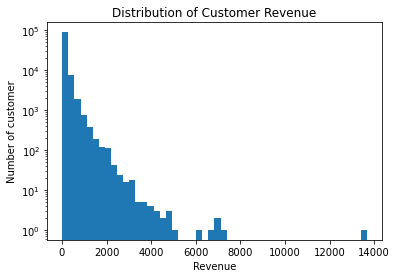

In [264]:
# Histogram of revenue by customers
plt.hist(customers_revenue['revenue'], bins=50)
plt.xlabel('Revenue')
plt.ylabel('Number of customer')
plt.title('Distribution of Customer Revenue')
plt.yscale('log')
plt.show()

b. Divide the sellers into groups based on the revenue generated 

In [265]:
# Total revenue generated by each customer
sellers_revenue = orders_data.groupby('seller_id')['amount'].sum().rename('revenue').reset_index()
# customers into groups based on the revenue generated
sellers_revenue['revenue_group'] = pd.qcut(sellers_revenue['revenue'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
sellers_revenue.head()

,seller_id,revenue,revenue_group
0,0015a82c2db000af6aaaf3ae2ecb0532,2748.06,High
1,001cca7ae9ae17fb1caed9dfb1094831,33934.17,Very High
2,001e6ad469a905060d959994f1b41e4f,267.94,Low
3,002100f778ceb8431b7a1020ff7ab48f,2028.16,High
4,003554e2dce176b5555353e4f3555ac8,139.38,Low


In [266]:
sellers_revenue.groupby('revenue_group').revenue.sum()

revenue_group
Low            103273.48
Medium         445731.96
High          1577867.50
Very High    13716680.30
Name: revenue, dtype: float64

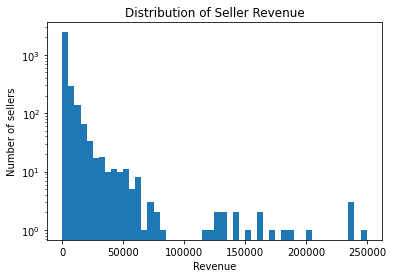

In [268]:
# Histogram of revenue by sellers
plt.hist(sellers_revenue['revenue'], bins=50)
plt.xlabel('Revenue')
plt.ylabel('Number of sellers')
plt.title('Distribution of Seller Revenue')
plt.yscale('log')
plt.show()

In [269]:
sellers_revenue.sort_values(by=['revenue'], ascending=[False]).reset_index()

,index,seller_id,revenue,revenue_group
0,857,4869f7a5dfa277a7dca6462dcf3b52b2,249640.70,Very High
1,1535,7c67e1448b00f6e969d365cea6b010ab,239536.44,Very High
2,1013,53243585a1d6dc2643021fd1853d8905,235856.68,Very High
3,881,4a3ca9315b744ce9f8e9374361493884,235539.96,Very High
4,3024,fa1c13f2614d7b5c4749cbc52fecda94,204084.73,Very High
...,...,...,...,...
3090,1370,702835e4b785b67a084280efca355756,18.56,Low
3091,869,4965a7002cca77301c82d3f91b82e1a9,16.36,Low
3092,373,1fa2d3def6adfa70e58c276bb64fe5bb,15.90,Low
3093,1465,77128dec4bec4878c37ab7d6169d6f26,15.22,Low


3. Cross-Selling (Which products are selling together)
Hint: We need to find which of the top 10 combinations of products are selling together in 
each transaction. (combination of 2 or 3 buying together)

In [270]:
# list of all product combinations ordered in each order
orders_data_1 = orders_data.groupby('order_id')['product_id'].apply(list).reset_index(name='products')
orders_data_1

,order_id,products
0,00010242fe8c5a6d1ba2dd792cb16214,[4244733e06e7ecb4970a6e2683c13e61]
1,00018f77f2f0320c557190d7a144bdd3,[e5f2d52b802189ee658865ca93d83a8f]
2,000229ec398224ef6ca0657da4fc703e,[c777355d18b72b67abbeef9df44fd0fd]
3,00024acbcdf0a6daa1e931b038114c75,[7634da152a4610f1595efa32f14722fc]
4,00042b26cf59d7ce69dfabb4e55b4fd9,[ac6c3623068f30de03045865e4e10089]
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,[4aa6014eceb682077f9dc4bffebc05b0]
98662,fffcd46ef2263f404302a634eb57f7eb,[32e07fd915822b0765e448c4dd74c828]
98663,fffce4705a9662cd70adb13d4a31832d,[72a30483855e2eafc67aee5dc2560482]
98664,fffe18544ffabc95dfada21779c9644f,[9c422a519119dcad7575db5af1ba540e]


In [271]:
# created a function to create all combinations of 2 or 3 products IDs of products bought together.

from itertools import combinations

def create_combinations (product_list):
    possible_combinations = []
    for var in range(2, 4):
        for var_1 in combinations(product_list, var):
            possible_combinations.append(list(var_1))
    return possible_combinations

In [272]:
orders_data_1['product_combinations'] = orders_data_1['products'].apply(create_combinations)
orders_data_1

,order_id,products,product_combinations
0,00010242fe8c5a6d1ba2dd792cb16214,[4244733e06e7ecb4970a6e2683c13e61],[]
1,00018f77f2f0320c557190d7a144bdd3,[e5f2d52b802189ee658865ca93d83a8f],[]
2,000229ec398224ef6ca0657da4fc703e,[c777355d18b72b67abbeef9df44fd0fd],[]
3,00024acbcdf0a6daa1e931b038114c75,[7634da152a4610f1595efa32f14722fc],[]
4,00042b26cf59d7ce69dfabb4e55b4fd9,[ac6c3623068f30de03045865e4e10089],[]
...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,[4aa6014eceb682077f9dc4bffebc05b0],[]
98662,fffcd46ef2263f404302a634eb57f7eb,[32e07fd915822b0765e448c4dd74c828],[]
98663,fffce4705a9662cd70adb13d4a31832d,[72a30483855e2eafc67aee5dc2560482],[]
98664,fffe18544ffabc95dfada21779c9644f,[9c422a519119dcad7575db5af1ba540e],[]


In [273]:
# converting the lists of combinations into a single list containing of  all the products combinations.
combinations_list = [item for sublist in orders_data_1['product_combinations'] for item in sublist]
combinations_list

[['880be32f4db1d9f6e2bec38fb6ac23ab', 'd41dc2f2979f52d75d78714b378d4068'],
 ['13944d17b257432717fd260e69853140', '1f9799a175f50c9fa725984775cac5c5'],
 ['4c3ae5db49258df0784827bdacf3b396', 'fb7a100ec8c7b34f60cec22b1a9a10e0'],
 ['4dcb49b9ca7e48d2f108d40caa77caa2', '9bb2d066e4b33b624cbdfec7d50b3dcb'],
 ['636598095d69a5718e67d2c9a3c7dde6', 'b6397895a17ce86decd60b898b459796'],
 ['55939df5d8d2b853fbc532bf8a00dc32', '6c90c0f6c2d89eb816b9e205b9d6a36a'],
 ['55939df5d8d2b853fbc532bf8a00dc32', 'b7d94dc0640c7025dc8e3b46b52d8239'],
 ['55939df5d8d2b853fbc532bf8a00dc32', 'd143bf43abb18593fa8ed20cc990ae84'],
 ['6c90c0f6c2d89eb816b9e205b9d6a36a', 'b7d94dc0640c7025dc8e3b46b52d8239'],
 ['6c90c0f6c2d89eb816b9e205b9d6a36a', 'd143bf43abb18593fa8ed20cc990ae84'],
 ['b7d94dc0640c7025dc8e3b46b52d8239', 'd143bf43abb18593fa8ed20cc990ae84'],
 ['55939df5d8d2b853fbc532bf8a00dc32',
  '6c90c0f6c2d89eb816b9e205b9d6a36a',
  'b7d94dc0640c7025dc8e3b46b52d8239'],
 ['55939df5d8d2b853fbc532bf8a00dc32',
  '6c90c0f6c2d89eb816b

In [276]:
# frequency of each combination
combination_counts = pd.DataFrame(pd.Series(combinations_list).value_counts()).reset_index()
combination_counts.columns = ['combination', 'count']
# The top 10 combinations of products that are selling together(2/3) in each transaction. 
combination_counts.head(10)

,combination,count
0,"[36f60d45225e60c7da4558b070ce4b60, e53e557d5a1...",34
1,"[35afc973633aaeb6b877ff57b2793310, 99a4788cb24...",29
2,"[4fcb3d9a5f4871e8362dfedbdb02b064, f4f67ccaece...",17
3,"[36f60d45225e60c7da4558b070ce4b60, 3f14d740544...",12
4,"[389d119b48cf3043d311335e499d9c6b, 422879e10f4...",11
5,"[389d119b48cf3043d311335e499d9c6b, 53759a2ecdd...",9
6,"[368c6c730842d78016ad823897a372db, 53759a2ecdd...",8
7,"[422879e10f46682990de24d770e7f83d, 53759a2ecdd...",7
8,"[18486698933fbb64af6c0a255f7dd64c, dbb67791e40...",7
9,"[99a4788cb24856965c36a24e339b6058, f2e53dd1670...",6


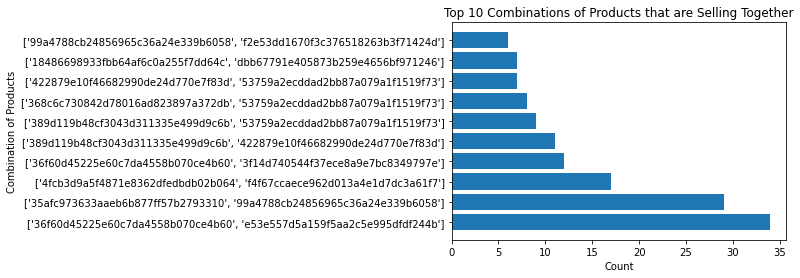

In [277]:
combinations = [str(x) for x in combination_counts['combination'].values]
counts = combination_counts['count'].values

# create a bar chart of the top 10 combinations
plt.barh(combinations[:10], counts[:10])
plt.ylabel('Combination of Products')
plt.xlabel('Count')
plt.title('Top 10 Combinations of Products that are Selling Together')
plt.show()

4. Payment Behaviour

a. How customers are paying?

In [278]:
payment_totals = payments.groupby('payment_type')['payment_value'].sum().reset_index()
payment_totals = payment_totals.sort_values('payment_value', ascending=False)
payment_totals.head()

,payment_type,payment_value
1,credit_card,12542084.19
0,UPI,2869361.27
3,voucher,379436.87
2,debit_card,217989.79


b. Which payment channels are used by most customers?

In [279]:
payments.payment_type.value_counts()

credit_card    76795
UPI            19784
voucher         5775
debit_card      1529
Name: payment_type, dtype: int64

Text(0.5, 1.0, 'Transactions By Payment Types')

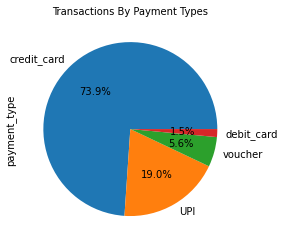

In [280]:
payments['payment_type'].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.title('Transactions by Payment Types'.title() , fontsize=10)

5. Customer satisfaction towards category & product

a. Which categories (top 10) are maximum rated & minimum rated?

In [281]:
reviews_1 = reviews.groupby('order_id')['review_score'].mean().reset_index()
reviews_1

,order_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,5.0
1,00018f77f2f0320c557190d7a144bdd3,4.0
2,000229ec398224ef6ca0657da4fc703e,5.0
3,00024acbcdf0a6daa1e931b038114c75,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,5.0
...,...,...
99436,fffc94f6ce00a00581880bf54a75a037,5.0
99437,fffcd46ef2263f404302a634eb57f7eb,5.0
99438,fffce4705a9662cd70adb13d4a31832d,5.0
99439,fffe18544ffabc95dfada21779c9644f,5.0


In [282]:
orders_reviews = pd.merge(orders_data, reviews_1,how='left',on = 'order_id')
orders_reviews

,order_purchase_timestamp,order_id,product_id,product_category_name,order_item_qty,amount,price,freight_value,customer_id,seller_id,customer_zip_code_prefix,customer_city,customer_state,review_score
0,2017-10-02 10:56:00,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,Housewares,1,38.71,29.99,8.72,9ef432eb6251297304e76186b10a928d,3504c0cb71d7fa48d967e0e4c94d59d9,3149,Akkarampalle,Andhra Pradesh,4.0
1,2018-07-24 20:41:00,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8,Perfumery,1,141.46,118.70,22.76,b0830fb4747a6c6d20dea0b8c802d7ef,289cdb325fb7e7f891c38608bf9e0962,47813,Pandariya,Chhattisgarh,4.0
2,2018-08-08 08:38:00,47770eb9100c2d0c44946d9cf07ec65d,aa4383b373c6aca5d8797843e5594415,Auto,1,179.12,159.90,19.22,41ce2a54c0b03bf3443c3d931a367089,4869f7a5dfa277a7dca6462dcf3b52b2,75265,Dhamdha,Chhattisgarh,5.0
3,2017-11-18 19:28:00,949d5b44dbf5de918fe9c16f97b45f8a,d0b61bfb1de832b15ba9d266ca96e5b0,Pet_Shop,1,72.20,45.00,27.20,f88197465ea7920adcdbec7375364d82,66922902710d126a0e7d26b0e3805106,59296,Kartarpur,Punjab,5.0
4,2018-02-13 21:18:00,ad21c59c0840e6cb83a9ceb5573f8159,65266b2da20d04dbe00c5c2d3bb7859e,Stationery,1,28.62,19.90,8.72,8ab97904e6daea8866dbdbc4fb7aad2c,2c9e548be18521d1c43cde1c582c6de8,9195,Bheemavaram,Andhra Pradesh,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102420,2017-03-09 09:54:00,9c5dedf39a927c1b2549525ed64a053c,ac35486adb7b02598c182c2ff2e05254,Health_Beauty,1,85.08,72.00,13.08,39bd1228ee8140590ac3aca26f2dfe00,e24fc9fcd865784fb25705606fe3dfe7,12209,Bobbili,Andhra Pradesh,5.0
102421,2018-02-06 12:58:00,63943bddc261676b46f01ca7ac2f7bd8,f1d4ce8c6dd66c47bbaa8c6781c2a923,Baby,1,195.00,174.90,20.10,1fca14ff2861355f6e5f14306ff977a7,1f9ab4708f3056ede07124aad39a2554,11722,Mahendragarh,Haryana,4.0
102422,2017-08-27 14:46:00,83c1379a015df1e13d02aae0204711ab,b80910977a37536adeddd63663f916ad,Home_Appliances_2,1,271.01,205.99,65.02,1aa71eb042121263aafbe80c1b562c9c,d50d79cb34e38265a8649c383dcffd48,45920,Bidasar,Rajasthan,5.0
102423,2018-01-08 21:28:00,11c177c8e97725db2631073c19f07b62,d1c427060a0f73f6b889a5c7c61f2ac4,Computers_Accessories,2,441.16,359.98,81.18,b331b74b18dc79bcdf6532d51e1637c1,a1043bafd471dff536d0c462352beb48,28685,Banaur,Punjab,2.0


In [283]:
category_ratings = orders_reviews.groupby('product_category_name')['review_score'].mean().reset_index()
category_ratings = category_ratings.sort_values('review_score', ascending=False)

In [284]:
print('Max rated categories')
category_ratings.head(10)

Max rated categories


,product_category_name,review_score
11,Cds_Dvds_Musicals,4.666667
29,Fashion_Childrens_Clothes,4.500000
8,Books_General_Interest,4.439623
9,Books_Imported,4.389831
37,Food_Drink,4.378205
22,Costruction_Tools_Tools,4.371134
10,Books_Technical,4.340909
53,Luggage_Accessories,4.327307
64,Small_Appliances_Home_Oven_And_Coffee,4.302632
35,Flowers,4.275862


In [285]:
print('Min rated categories')
category_ratings.tail(10)

Min rated categories


,product_category_name,review_score
47,Home_Confort,3.852217
19,Construction_Tools_Safety,3.846154
4,Audio,3.818571
41,Furniture_Mattress_And_Upholstery,3.815789
23,Diapers_And_Hygiene,3.740741
27,Fashio_Female_Clothing,3.712500
46,Home_Comfort_2,3.708333
30,Fashion_Male_Clothing,3.617886
57,Office_Furniture,3.585955
61,Security_And_Services,2.500000


b. Which products (top10) are maximum rated & minimum rated?

In [286]:
product_ratings = orders_reviews.groupby(['product_id','product_category_name'])['review_score'].mean().reset_index()
product_ratings = product_ratings.sort_values('review_score', ascending=False)

In [287]:
print('Max rated products')
product_ratings.head(10)

Max rated products


,product_id,product_category_name,review_score
0,00066f42aeeb9f3007548bb9d3f33c38,Perfumery,5.0
12122,5f4a2dd6b0e07a858c761e41abc8ec8c,Sports_Leisure,5.0
12105,5f2ad53b751662e4c54dceffadb3804d,Fashion_Sport,5.0
12106,5f2bbb2425de4f4853839fd12fc87d6e,Sports_Leisure,5.0
24995,c60d6fe365c9718c407170dd8a8223c3,Bed_Bath_Table,5.0
12108,5f30303a0e011f4746c76054639a2afb,Baby,5.0
12110,5f348c2c79eb5d1eea867e7903fce1ee,Small_Appliances,5.0
12111,5f39447057f5cc7964f30ec06ebf73a1,Health_Beauty,5.0
12112,5f3a6b9196dde7e3702ec07bbdd34fab,Industry_Commerce_And_Business,5.0
12113,5f3e86b7e537b8d2d993596c969b69a6,Luggage_Accessories,5.0


In [288]:
print('Min rated products')
product_ratings.tail(10)

Min rated products


,product_id,product_category_name,review_score
8975,4652e11aee23d86203400f6094fbe8bf,Auto,1.0
8961,4632bc49b300378ed4f1d48f424d414e,Auto,1.0
26827,d40ab3a40d37ebabeaf061efefb4a40d,Bed_Bath_Table,1.0
8912,45e1e8edc20a5fabee57761f03feafc4,Telephony,1.0
26854,d43f4e32cbdc4fc0a825ed4020475c82,Sports_Leisure,1.0
26855,d44044e34c071272f708ec2e6fa3ddfe,Auto,1.0
26861,d44b26fcb399a78808dc8643d991ec14,Health_Beauty,1.0
26863,d452e9bafef21d2501e9bc3eb5e0bd47,Toys,1.0
26870,d4591f790b3b30ebc3cc132764e86741,Signaling_And_Security,1.0
16164,7f47a78f50b93196e945ec522b6e6788,Toys,1.0


c. Average rating by location, seller, product, category, month etc.

In [289]:
# Average rating by state
ratings_by_location_1 = orders_reviews.groupby(['customer_state'])['review_score'].mean().reset_index()
ratings_by_location_1

,customer_state,review_score
0,Andhra Pradesh,4.044051
1,Arunachal Pradesh,4.109266
2,Chhattisgarh,4.077379
3,Delhi,4.046134
4,Goa,4.800000
5,Gujarat,4.074533
6,Haryana,4.149119
7,Himachal Pradesh,4.000656
8,Jammu & Kashmir,4.048872
9,Karnataka,4.054511


In [290]:
# Top 10 max rated state
ratings_by_location = orders_reviews.groupby(['customer_state'])['review_score'].mean().reset_index()
ratings_by_location = ratings_by_location.sort_values('review_score', ascending=False)
ratings_by_location.head(10)

,customer_state,review_score
4,Goa,4.800000
14,Punjab,4.194245
15,Rajasthan,4.165049
16,Tamil Nadu,4.152822
17,Uttar Pradesh,4.152672
6,Haryana,4.149119
13,Orissa,4.133438
10,Kerala,4.129878
12,Maharashtra,4.118440
1,Arunachal Pradesh,4.109266


In [291]:
# Average rating by city
ratings_by_location_2 = orders_reviews.groupby(['customer_city'])['review_score'].mean().reset_index()
ratings_by_location_2

,customer_city,review_score
0,Aadityana,3.764706
1,Aambaliyasan,3.500000
2,Aantaliya,3.968085
3,Aarambhada,3.695652
4,Abiramam,5.000000
...,...,...
4105,Zamin Uthukuli,4.000000
4106,Ziauddin Pur,3.979021
4107,Zira,4.500000
4108,Zirakpur,4.500000


In [292]:
# Top 10 max rated city
ratings_by_location = orders_reviews.groupby(['customer_city'])['review_score'].mean().reset_index()
ratings_by_location = ratings_by_location.sort_values('review_score', ascending=False)
ratings_by_location.head(10)

,customer_city,review_score
3339,Sanchore,5.0
3243,Reoti,5.0
1026,Dhaulpur,5.0
1025,Dhatrigram,5.0
3250,Risia Bazar,5.0
1021,Dharoti Khurd,5.0
3251,Rithora,5.0
2471,Monoharpur,5.0
2466,Mohiuddinpur,5.0
1013,Dharchula Dehat,5.0


In [293]:
# Average rating by state & city
ratings_by_location_3 = orders_reviews.groupby(['customer_state','customer_city'])['review_score'].mean().reset_index()
ratings_by_location_3

,customer_state,customer_city,review_score
0,Andhra Pradesh,Adilabad,4.052941
1,Andhra Pradesh,Adoni,4.267085
2,Andhra Pradesh,Akkarampalle,4.138623
3,Andhra Pradesh,Akkayapalle,4.114428
4,Andhra Pradesh,Alwal,4.063887
...,...,...,...
4105,West Bengal,Uttar Latabari,5.000000
4106,West Bengal,Uttar Mahammadpur,4.000000
4107,West Bengal,Uttar Pirpur,5.000000
4108,West Bengal,Uttar Raypur,5.000000


In [294]:
# Top 10 max rated location
ratings_by_location = orders_reviews.groupby(['customer_state','customer_city'])['review_score'].mean().reset_index()
ratings_by_location = ratings_by_location.sort_values('review_score', ascending=False)
ratings_by_location.head(10)

,customer_state,customer_city,review_score
2528,Tamil Nadu,Dhalavoipuram,5.0
1085,Karnataka,Thumbe,5.0
3268,Uttar Pradesh,Chail,5.0
3273,Uttar Pradesh,Chandpur,5.0
2095,Punjab,Bathinda,5.0
1073,Karnataka,Siruguppa,5.0
2097,Punjab,Bhabat,5.0
1068,Karnataka,Sidlaghatta,5.0
3276,Uttar Pradesh,Chaumuhan,5.0
3277,Uttar Pradesh,Chhaprauli,5.0


In [295]:
# Average rating for each seller
ratings_by_seller = orders_reviews.groupby(['seller_id'])['review_score'].mean().reset_index()
ratings_by_seller

,seller_id,review_score
0,0015a82c2db000af6aaaf3ae2ecb0532,3.666667
1,001cca7ae9ae17fb1caed9dfb1094831,3.935323
2,001e6ad469a905060d959994f1b41e4f,1.000000
3,002100f778ceb8431b7a1020ff7ab48f,3.981818
4,003554e2dce176b5555353e4f3555ac8,5.000000
...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,1.000000
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,4.333333
3092,ffeee66ac5d5a62fe688b9d26f83f534,4.214286
3093,fffd5413c0700ac820c7069d66d98c89,3.866667


In [296]:
# Top 10 max rated seller IDs
ratings_by_seller = orders_reviews.groupby(['seller_id'])['review_score'].mean().reset_index()
ratings_by_seller = ratings_by_seller.sort_values('review_score', ascending=False)
ratings_by_seller.head(10)

,seller_id,review_score
1838,964ff64dc05b13811c6d0f41e0aa5f6b,5.0
677,3986c0b54f6b748b75e7bd4e092aa3e5,5.0
665,38f276ca6e7cc95a6d1bb55ac9e5550f,5.0
2041,a81466620e46a6970b22ef40379fdfc9,5.0
1450,75fdd0a732287f9497b179f6bd445d32,5.0
2422,c8143b3069f6746a77421b5ce30a450c,5.0
1451,761681a821d8275bc79f552116d06869,5.0
2679,dd88d13bea9e4c2bf47daf224f8141e5,5.0
1453,762fafdaa57a532ee0119731697579dd,5.0
370,1f7fd2a6fcd5a6fa5d8a4dabc72aaae0,5.0


In [297]:
# Average rating for each product
ratings_by_product = orders_reviews.groupby(['product_id','product_category_name'])['review_score'].mean().reset_index()
ratings_by_product

,product_id,product_category_name,review_score
0,00066f42aeeb9f3007548bb9d3f33c38,Perfumery,5.0
1,00088930e925c41fd95ebfe695fd2655,Auto,4.0
2,0009406fd7479715e4bef61dd91f2462,Bed_Bath_Table,1.0
3,000b8f95fcb9e0096488278317764d19,Housewares,5.0
4,000d9be29b5207b54e86aa1b1ac54872,Watches_Gifts,5.0
...,...,...,...
32323,fff6177642830a9a94a0f2cba5e476d1,Cool_Stuff,4.5
32324,fff81cc3158d2725c0655ab9ba0f712c,Health_Beauty,4.0
32325,fff9553ac224cec9d15d49f5a263411f,Fashion_Bags_Accessories,5.0
32326,fffdb2d0ec8d6a61f0a0a0db3f25b441,Computers_Accessories,5.0


In [298]:
# Average rating for each category
ratings_by_category = orders_reviews.groupby(['product_category_name'])['review_score'].mean().reset_index()
ratings_by_category

,product_category_name,review_score
0,Agro_Industry_And_Commerce,4.027322
1,Air_Conditioning,3.984252
2,Art,4.004950
3,Arts_And_Craftmanship,4.125000
4,Audio,3.818571
...,...,...
66,Stationery,4.218606
67,Tablets_Printing_Image,4.075949
68,Telephony,3.971075
69,Toys,4.160719


In [301]:
# Average rating for each month
ratings_by_month = reviews.groupby([reviews['review_answer_timestamp'].dt.to_period('M')]).agg({'review_score':'mean','review_id':'count'}).reset_index()
ratings_by_month.rename( columns = {'review_id': 'Num. of reviews'}, inplace = True )
ratings_by_month.sort_values('Num. of reviews', ascending=False)

,review_answer_timestamp,review_score,Num. of reviews
22,2018-08,4.194905,8871
14,2017-12,3.928299,7866
17,2018-03,3.752496,7713
18,2018-04,3.867743,7682
19,2018-05,4.181746,7571
20,2018-06,4.167266,6397
15,2018-01,4.024625,6335
16,2018-02,3.989943,6165
21,2018-07,4.273828,5865
13,2017-11,4.094493,4667


In [300]:
# Average rating for each month rated in descending order
ratings_by_month.sort_values('review_score', ascending=False)

,review_answer_timestamp,review_score,Num. of reviews
3,2017-01,4.398990,198
23,2018-09,4.310726,634
4,2017-02,4.278665,1378
21,2018-07,4.273828,5865
10,2017-08,4.211486,4388
22,2018-08,4.194905,8871
19,2018-05,4.181746,7571
11,2017-09,4.180430,4190
12,2017-10,4.169985,4571
20,2018-06,4.167266,6397
